# machine learning
    field of study that gives computers the ability to learn without being explicitly programmed. Machine 
    learning can extract structure from data and solve problems that are normally too difficult or tedious for 
    human to solve.
    
    supervised learning: learn the relationship between feature and target(continuous, regression problem; 
    categorical, classification problem) to predict unseen or future data.
    
    for multiclass classification, use one vs rest method(for each target class, run a binary classification 
    prediction for this class vs rest of classes. finally target class with highest probability is the predicted 
    class)
    
    unsupervised learning: training an algorithm without giving it answers for examples in your dataset. The 
    algorithm don't make predictions from the data. There are 2 common types of unsupervised learning: clustering
    (discover natural groupings in a dataset, kmeans), dimensionality reduction(data compression algorithm, 
    PCA(principle component analysis), pca.explained_variance_ratio tell how much percent information is retained)
    PCA(n_components=0.90) # integer means number of component, decimal means pick minimal components that target 
    percent of information retained

    Overfitting: a model matches the training data almost perfectly, but does poorly in validation and other new 
        data. capturing spurious patterns that won't recur in the future, leading to less accurate predictions.
    underfitting: a model fails to capture important relevant distinctions and patterns in the data, performs 
        poorly even in training data, leading to less accurate predictions.
    
    cross-validation: run modeling process on different subsets of the data, and test on rest of data to get 
        multiple measures of model quality. Cross-validation gives a more accurate measure of model quality, but 
        take longer to run suitable for small datasets.

    Pipelines: a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline 
        bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step. Some
        benefits includes: cleaner code, fewer bugs, easier to productionize, more option for model validation.

    Data leakage(or leakage):  happens when training data contains information about the target, but similar data 
        will not be available when the model is used for prediction. This leads to high performance on the training 
        set (and possibly even the validation data), but perform poorly in production.
        There are two main types of leakage: target leakage and train-test contamination.
        Target leakage: occurs when your predictors include data that will not be available at the time you make 
            predictions. Ex. predict whether people get disease, include column whether take medicine.
            To prevent this type of data leakage, any variable updated (or created) after the target value is 
            realized (moment of prediction) should be excluded.
        Train-test contamination: happened when validation data affects the preprocessing behavior. Ex. apply mean 
            fill missing data before train test split. 
            Although should do the same preprocessing on all your data however if that preprocessing depends on the
            data (e.g. standardization, pca) then you should calculate it on your training data and then use the 
            parameters from that calculation to apply it to your validation and test data.
            It's easier if you use scikit-learn pipelines(no need specify preprocessing on validation data), 
            otherwise for validation/ test data, when using encoder/scalar only use transform(), while need to 
            use encoder/scalar fit_transform on test data first.

# Steps of machine learning
1. Data collection (accurate, relevant, variability, quantity of data, ethic(bias))

2. Data exploration
    instances refer to row (each independent example of a concept), 
    (categorical/continuous)feature refer to column(property or characteristic of an instance)
    features include independent abd deoendent(need to be predicted) variables 
    categorical dependent variable also known as class, continuous dependent variable known as response
        
    sparcity vs density: if 20% data missing, then data is 20% sparse, or 80% dense
        
    Comparison visualization: illustrate the difference between two or more items (boxplot)
    Replation visualization: illustrate the correlation between two or more continuos variable (scatterplot, 
        line chart, barplot, heatmap)
    Distribution visualization: illustrate the distribution of the values of a feature (histogram, kde plot)
    Composition visualization: illustrate the component makeup of the date (stack bar chart)

        
3. Data preparation
    missing data: 
        need to figure out (read documentation) why the value is missing. Is this value missing because it 
            wasn't recorded (need imputation)or because it doesn't exist (leave as none)?
        1. drop rows/columns with missing data;   dropna()
        2. Imputation/fills in the missing values with some number(usually mean or mode), usually better than 
            simple drop;   fillna()
        3. Imputation/fills in the missing values and add boolean columns for each column with missing values, 
            to indicate there is missing value in this row with corresponding column.
        other complex strategies for filling missing values typically give no additional benefit once you plug 
        the results into sophisticated machine learning models.

    convert category data: will get an error if you try to plug these variables into most machine learning 
        models in Python without preprocessing them first. Have several options: drop the column; pandas dummy;
        pandas cat.codes; sklearn OneHotEncoder; sklearn OrdinalEncoder(feature), sklearn LabelEncoder(target 
        variable), factorize() function

    parsing dates:
        df['date_col_parsed'] = pd.to_datetime(df['date_col'], format="%m/%d/%y")  # y/Y for 2/4 digit year
            # parse from object to date datatype, if has error, add param: infer_datetime_format=True
        df = pd.read_csv('x.csv', parse_dates=['date_col'], dayfirst=True)  # first day then month
            # can add param: infer_datetime_format=True
        days = df['date_col_parsed'].dt.day   # access date object day attribute
    
    character encoding: convert all text to UTF-8 when you read in files and keep it in that encoding. Python 
        string default use utf-8. use chardet.detect to guess the encoding type
        with open("../input/kickstarter-projects/ks-projects-201801.csv", 'rb') as rawdata:
            result = chardet.detect(rawdata.read(10000))     # read first 10000 char to speed up
            # {'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}
        df = pd.read_csv("x.csv", encoding='Windows-1252')  # read different encoding, read/write default utf-8
    
    Inconsistent Data Entry: for example German, german, germany should be consistent in country column.
        from fuzzywuzzy import process
        df['Country'] = professors['Country'].str.lower().strip()
        countries = df['Country'].unique()    # to find inconsistency data entry
        matches = process.extract("south korea", countries, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
            # return matching score for all unique value in list, 0-100, 100 means same, rreturn 10 closest strings
            # [('south korea', 100), ('southkorea', 48), ('saudi arabia', 43),]

    outlier, class imbalance
    normalization(changing the shape of the distribution of your data to normal distribution): 
        use for machine learning models or statistics technique that assumes your data is normally distributed. 
        z-score(avg 0, std 1)    StandardScaler(mean 0, std 1), 
        stats.boxcox(keep original mean,std)
        log transformation(if has outlier, apply to only positive values)
    scaling (changing the range of your data)
        when using methods based on measures of how far apart data points are, like support vector machines (SVM) 
        or k-nearest neighbors (KNN). a change of "1" in any numeric feature is given the same importance.
        min-max(lower to upper bound)    MinMaxScaler
    data sampling with/ without replacement, stratified sampling(keep original value distribution)    
        train_test_split
    
    
    Feature engineering: make data better suited to the problem. Improve a model's predictive performance; 
        reduce computational or data needs; improve interpretability of the results.
        The key idea is that a transformation you apply to a feature becomes in essence a part of the model.
        For example, transform the features to make their relationship to the target linear for linear model. 
        
        First establish a baseline by training the model on the un-augmented dataset. This will help determine 
        whether our new features(derived from columns math operation) are actually useful.
        
        A great first step is to construct a ranking with a feature utility metric(mutual information can 
        detect any relationship, while correlation only detects linear relationships), measuring 
        associations between a feature and the target. 

        Mutual information(MI): describes relationships in terms of uncertainty (measured by entropy), measure of 
            the extent to which knowledge of one quantity reduces uncertainty about the other. easy to use and 
            interpret, computationally efficient, theoretically well-founded, resistant to overfitting, able to 
            detect any kind of relationship. MI range [0,inf), 0 is two variable complete irrelevant, above 2 is 
            very closely relevant. MI can't detect interactions between features. It is a univariate metric (only 
            measure relative potential of only one feature as a predictor of the target alone). Feature has a high
            MI score doesn't gaurantee a good information gain, may need to transform the feature first to expose 
            the association.
            Data visualization is a great follow-up to a utility ranking. 
        
        Creating Features: Understand the features (refer to dataset documentation), acquire domain knowledge, 
            study previous work, use data visualization.
            Mathematical transformation: Logarithm is effective at normalizing highly skewed data (find by plotting)
                df['math feature'], df['math feature2'] = df.col1 / df.col2 * df.col3 ** 2, df.col3.apply(np.log1p)
            Count: Features describing the presence or absence of something often come in sets, aggregate such 
                features by creating a count.
                df["count feature"] = df['col1','col2','col3'].sum(axis=1)
                df["count feature2"] = df['col1','col2','col3'].gt(0).sum(axis=1)
            Building-up or Breaking-down features: complex strings that can usefully be broken into simpler pieces.
                df2[["Area", "Num"]] = df["Cell"].str.split(")", expand=True)  # split  and expand result into columns
                df["join feature"] = df.col1 + "_" + df.col2   # join columns string values to a new column
            Group transforms: aggregate information across multiple rows grouped by some category. If you had 
                discovered a category interaction, a group transform over that categry could be good to investigate.
                df["group feature"] = df.groupby('col1')['col2'].transform('mean')
                df["group feature2"] = df.groupby('col1')['col2'].transform('count') / df.col2.count
            
            If you're using training and validation splits, to preserve their independence, it's best to create a 
            grouped feature using only the training set and then join it to the validation set. 
                df_train = df.sample(frac=0.5)
                df_valid = df.drop(df_train.index)
                df_train["avg] = df_train.groupby("col1")["col2"].transform("mean")
                df_valid = df_valid.merge(df_train[["col1", "avg"]].drop_duplicates(), on="Coverage", how="left")
            
            Tips: 1. Linear models only learn sums and differences naturally. 2. Most models difficult to learn ratio. 
            Ratio combinations often lead to performance gains. 3. Linear models and neural nets(especially) generally 
            do better with normalized features. 4. Tree models can learn to approximate almost any combination of 
            features, but still helpful to explicitly created if important. 5. Counts are helpful for tree models, 
            since they don't have a natural way of aggregating information across many features at once.
        
        Clustering：assigning of data points to groups based upon how similar the points are to each other. Adding a 
            feature of cluster labels (categorical) can help machine learning models untangle complicated 
            relationships of space or proximity. Clustering will break up complicated relationships across features 
            into simpler chunks for model to learn for each chunk.
            K-means clustering: creates clusters by adding k centroids inside the feature-space, each point in the 
                dataset is assigned to the cluster has closest centroid (Euclidean distance). The circle of centroids 
                expand and collide, results called Voronoi tessallation. Algorithm repeats till converge(or iteration 
                limit): assign points to the nearest cluster centroid, move each centroid to minimize the distance to 
                its points.(repeat several cycles to avoid bad convergence)
                for a large number of clusters need more iteration, and complex dataset need more repeat cycles.
                Normalize data if has extreme values

        Principal Component Analysis(PCA): think of PCA as a partitioning of the variation(covariance, correlation for 
            un/standardized data) in the data, for creating more informative features. Instead of describing the data 
            with the original features, we describe it with its axes of variation. The axes of variation (pick axes 
            with max variation, while perpendicular to other axes) become the new features. New features (principal 
            components) that PCA constructs are just linear combinations (weighted sums) of the original features. 
            The weights on each principal components are called loadings.There will be as many principal components 
            as there are features in the original dataset.
            PCA only works with numeric features, sensitive to scale, consider removing or constraining outliers, can't 
                use for categorical data.
                X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
            PCA makes precise variance contribution through each component's percent of explained variance.
            There are two waya to use PCA: use principal components directly as new feature, or use high loadings 
            features com PCA and high MI score featues to create new features.
            PCA can be used for: 
            Dimensionality reduction when features are highly redundant (multicollinear, specifically), PCA will 
                partition out near-zero variance components.
            Anomaly detection: anomaly not apparent from the original features, will often show up in the 
                low-variance components.
            Noise reduction: PCA can sometimes collect the signal into less features while leaving the noise alone.
            Decorrelation: Some ML algorithms struggle with highly-correlated features. PCA transforms correlated 
                features into uncorrelated components, which could be easier for your algorithm to work with.

        Target encoding:  encoding categorical features as numbers, like one-hot or label encoding, with the difference 
            that it also uses the target to create the encoding(number). 
            df["cat_col1_encoded"] = df.groupby("cat_col1")["target"].transform("mean")  # if target is numeric or binary  
                can encode each categorical as the target mean for that category (called mean encoding), for binary 
                target, it's called bin counting. target encoding tend to overfit when small smaple size or need impute
                value for unseen category. To overcome these, use smoothing.
            smoothing: encoding = weight * in_category + (1 - weight) * overall     weight = n / (n + m)
                in_category is the previous category mean, m is smoothing factor(constant), n is item count with that 
                category in the data, overall is all data target mean. higher m lead to more weights on overall mean, 
                less noisy.
            Use target encoding when: there are lots of categories, if you suspect a categorical feature is more 
                important than MI score suggests, use target encoding to reveal importance
                target value distribution should be similar to encoded categorical data distribution
            

        Dimension Reduction:
            feature selection: identify minimal set of features needed to build a good model (remove uneccessary 
                features)
            feature extraction: use mathematical functions to transform high-dimensional data into lower dimensions 
            (features created are not easy to interpretted)

4. Modeling
    apply a machine learning approach to the data on training data
    models solve both classification and regression problem: Neural networks, K-nearest neighbors, Decision trees, 
        Naive Bayes, Support vector machine
    models only for classification: Logistic regression, Simple/multiple linear regression, Poisson regression,
        Polynomial regression
    
    algorithm: mathematical technique or equation(framework)    ex: linear regression y = mx + b
    model: equation that is formed by using data to find the parameter in the equation of an algorithm 
        ex: y= 0.45x-19
    
    Linear regression: y = mx + b, straight line predicting continuous value
    Logistic regression: (1 + e^(-(mx+b))^(-1)    sigmoid curve predicting binary class
        good: binary target variable, providing feature importance, setup is easy, train fast, result ok for 
            benchmark and small dataset, usually no tuning is required. 
        bad: can't deal with outlier, missing value, complex relationship. not support continuous target variable, 
            doesn't perform well with many rolls and few columns or many columns and few rolls, won't have best 
            performance
            
    Support vector machine (SVM): a classifier that finds an optimal hyperplane that maximize the margin between 
        two classes. Use kernel method to transform data that is not linearly separable in n-dimensional space to 
        a higher dimension where it is linearly separable.
        good: work well with categorical variable. work well when lots features and few rows. deal with complex 
            relationship, outliers
        bad: although work, but not that good for continuous target variable. handle lots rows and few features.
            can't provide feature importance. takes long time too train, and slighty more time to predict.
    
    Multilayer perceptron: classic feed-forward artificial neural network (core component of deep learning). It's
        also a connected series of nodes (in the form of a directed acyclic graph), where each node (in hidden 
        layer) represents a function or a model (relu, sigmoid, tanh,...). Input layer (each feature values) 
        connect to every node in the next layer (multiplication). In the end, the last hidden layer connect to the 
        output layer (represents the target variable)
        good: work with both categorical and continuous target variable, handle complex relationship, can tune a 
            lot of hyper parameters.
        bad: not for image recognition, time series. don't show feature importance (black box hard to understand), 
            train slow, need a lot of data
    
    Decision tree: a series of questions designed to assign a class or predict a continuous value. very 
        interpretable method, don't have to standardize features.
        
    Ensemble methods: combine the predictions of several models 
    Bagging: ensemble method that create one strong model from independent weak models trained in parallel.

    Random forest: model that merges a collection of independent decision trees to get a more accurate and stable
        prediction. It is an ensemble method (combine several machine learning models in order to decrease both 
        bias and variance). For training, random sample data set with replacement, random choose several features 
        for each dataset(different than Bagged tree model, where select all features result in similar trees) and 
        apply decision tree algorithm to generate independent trees. For prediction, use generated trees to 
        predict the test data, make final prediction with majority votes.
        good: work with both categorical and continuous target variable, provide insight on significance of 
        predictor, fast to train for benchmarking, can deal with missing values, outliers.
        bad: average accuracy performance, slow at prediction, not quite transparent when many estimators.

    Boosting: an ensemble method that aggregaates a number of weak models to create one strong model. It learns 
        from its mistake each iteration, models are not indepedent. For training, in each iteration, random sample 
        with higher weight of misclassified data to build a new weak model (train in sequence). For prediction, 
        use weighted vote of n weak models based on performance on test dataset (fast due to able to parallel)
        There are many boosting models, for example gradient boosing, adaptive boosting 

        Gradient boosting: predictions from all models are used to calculate a loss function (like mean squared 
        error, for instance). And loss function is used to fit a new model that will be added to the ensemble, which 
        has parameters determined using gradient descent on the loss function.
        
        XGBoost: stands for extreme gradient boosting, which is an implementation of gradient boosting with 
            several additional features focused on performance and speed. great result for tabular data. 

        good: work with both categorical and continuous target variable, better performance than random forest.
             provide insight on significance of predictors. fast prediction.
        bad: not quite transparent when many models. training is slow. Can't handle noisy data(outliers) well, 
            tend to overfit. 

    Stacking: an ensemble method that creates one strong metamodel that is trained on the predictions of several 
        independent base model. all models are fit on the same dataset. base model can be different algorithms. 
        there are usually only a few base models. A meta-model learn weights for  base models' predictions 
        (supplemental data is provided sometime). use sklearn.ensemble.StackingClassifier/Regressor(estimators, 
        final_estimator(default logistic regression), passthrough(whether provide supplement data)).
        good: work with both categorical and continuous target variable, good performance for complex novel problem
        bad: not a quick benchmark model, not transparent since combination of models. slow training and prediction  

5. Evaluation
    plot loss curve(iteration vs train/test loss) and use learning curve(total unique sample size vs train/test 
        performance) to determine under/overfitting.
    assess how well machine learning approach worked, using test data
    regression metrics: mean absolute error (MAE), mean squared error (MSE), r^2 (coefficient of determination
        [0, 1], score method)
    classification metrics: accuracy: # predict correct/ # total predicted, 
        precision: # predict positive that are positive / # total predicted positive, 
        recall: # predict positive that are positive / # total sample positive, 
        f1_score
     alternatively use pipe line: pipe = Pipeline([('scalar', StandardScaler()), ('pca', PCA(n_components=.9)), 
     ('logistic', LogisticRegresion())]); pipe.fit(X_train, y_train); pipe.score(X_test, y_test); 

6. Actionable insight
    Machine Learning Explainability: Insights are valuable for debugging, informing feature engineering, directing 
    future data collection, informing human decision-making, building trust(via cross-matching know facts)

    Feature importance: What features have the biggest averaged impact on all predictions, one of widely used and 
        understood, fast to calculate, consistent measurement is using permutation importance.
    Permutation importance: calculated after a model has been fitted, consider if randomly shuffle a single column 
        of the validation data affect the accuracy of predictions would especially suffer for important column that 
        model relied on heavily for predictions. (eli5.sklearn.PermutationImportance)
        steps: 1. Get a trained model. 2. Shuffle a single column value, make predictions using the resulting dataset. 
        Use predictions and the true target values to calculate how much the loss function suffered from shuffling. 
        That performance deterioration measures the importance of the variable you just shuffled. undo the shuffle.
        3. repeat step 2 with the next column in the dataset to calculat the importance for each column.
    
    Partial dependence plots: show how a feature affects predictions(keep othrt feature the same). Can be interpreted 
        similarly to the coefficients in linear/logistic regression model. calculated after a model has been fit.
        use the fitted model to predict our outcome. First repeatedly alter the value for one variable to make a series 
        of predictions using the fitted model and trace the outcome. repeat that experiment with multiple(2) rows from 
        the original dataset, plot the average predicted outcome on the vertical axis.
        The y axis is interpreted as change in the prediction (sklearn.inspection.PartialDependenceDisplay)
    SHAP Values (SHapley Additive exPlanations): break down an individual prediction to show the impact of each feature. 
        It can also be aggregated into powerful model-level insights.
        SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction 
        we'd make if that feature took some baseline value.
        sum(SHAP values for all features) = pred_for_team - pred_for_baseline_values
        Calculate the average model prediction. For each coalition(sample), calculate the difference between the model's 
        prediction without F and the average prediction.
        In the plot, feature values increase/decrease the prediction are in pink/blue, visual size shows the magnitude 
        of the feature's effect. Subtract the blue bars from the length of the pink bars equals the distance from the 
        base value to the output. Calculating SHAP values can be slow, except for xgboost.
        SHAP summary plots: give us a birds-eye view of feature importance and what is driving it. Each dot represents 
            a row of the dataProvide extra distribution information than permutation importance .
        SHAP dependence contribution plots: show how a single feature impacts predictions with distribution of effects. 
            Each dot represents a row of the data. Provide extra distribution information than partial dependence plots.


# Data Exploration 

In [2]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from time import time
import joblib
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## How to create a relationship visualization

<AxesSubplot: xlabel='Age', ylabel='Fare'>

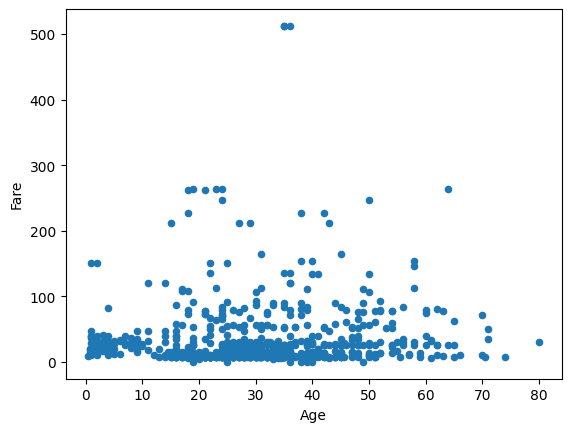

In [5]:
df.plot(kind='scatter', x='Age', y= 'Fare')

## How to create a distribution visualization

<AxesSubplot: ylabel='Frequency'>

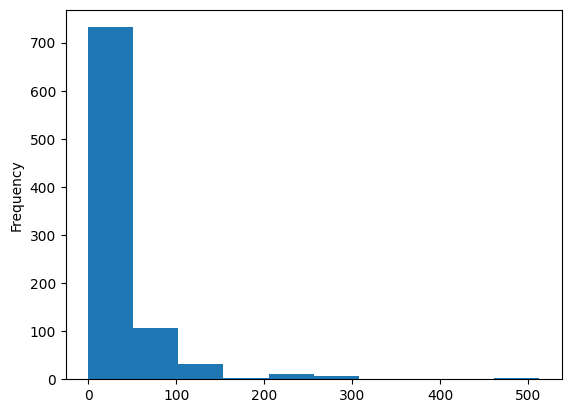

In [6]:
df['Fare'].plot(kind='hist')

## How to create a comparision visualization

In [7]:
df.pivot(columns='Pclass', values='Fare')

Pclass,1,2,3
0,NaN,NaN,7.250
1,71.2833,NaN,NaN
2,NaN,NaN,7.925
3,53.1000,NaN,NaN
4,NaN,NaN,8.050
...,...,...,...
886,NaN,13.0,NaN
887,30.0000,NaN,NaN
888,NaN,NaN,23.450
889,30.0000,NaN,NaN


<AxesSubplot: >

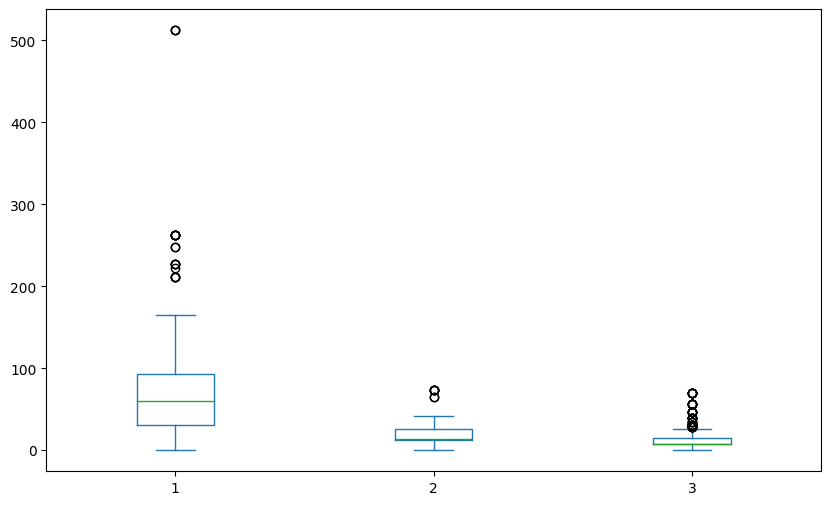

In [8]:
df.pivot(columns='Pclass', values='Fare').plot(kind='box', figsize=(10,6))

## How to create a composition visualization

In [9]:
df.groupby('Sex')['Embarked'].value_counts()   # value_counts(normalize=True) return percentage

Sex     Embarked
female  S           203
        C            73
        Q            36
male    S           441
        C            95
        Q            41
Name: Embarked, dtype: int64

In [10]:
df.groupby('Sex')['Embarked'].value_counts().unstack()

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


<AxesSubplot: xlabel='Sex'>

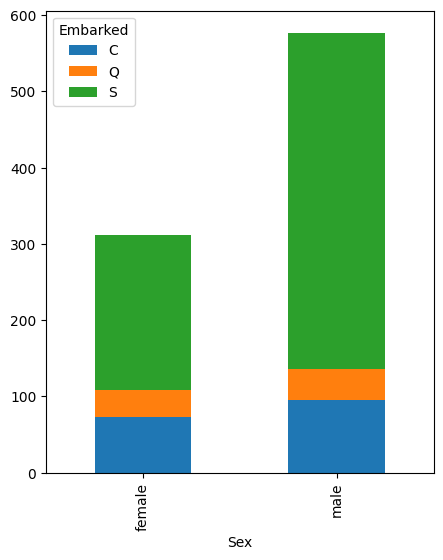

In [11]:
df.groupby('Sex')['Embarked'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(5,6))

In [12]:
df2 = df
df2.describe()   # age missing values (count), only shows statics for numeric column

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df2.groupby('Survived').mean()   
# show each feature mean group by survived, if mean has great difference, can indicate strong relationship

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [15]:
# df2.groupby(df.Age.isnull()).mean()
df2.groupby(df['Age'].isnull()).mean()  # group by whether age is null, show rest features mean 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


# Data Preparation

In [16]:

drop_column = ['PassengerId','Name','Ticket']
df2.drop(drop_column, axis=1,inplace=True)
df3=df2.copy()
# Fill missing values using fillna
df2['Age'].fillna(df2['Age'].mean(), inplace=True)  # method='bfill'
df2.fillna({'Gender': 'Female'}, inplace=True)
# df2['Age'].dropna(subset=['Age','Cabin'], how='all', inplace=True)  # drop row if both age and cabin missing data
# df2.dropna(axis=1, thresh=10)   # drop column if more than 10% data missing
df2.isnull().sum()   # count empty for each column

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [17]:
cols_with_missing = [col for col in df2.columns if df2[col].isnull().any()]
# categorical_cols = [col for col in df2.columns if df2[col].nunique() < 10 and df2[col].dtype == "object"]
df2.Age.nunique()

89

In [18]:
# Fill missing values using imputer or column transformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cols_with_missing = [col for col in df2.columns if df2[col].isnull().any()]

# optional, add indicator columns for whether a row is missing one column value, might have negative effect
for col in cols_with_missing:
    df3[col + '_was_missing'] = df3[col].isnull()    

# Imputation    
impute_mean = SimpleImputer()  # default missing_values=np.nan, strategy='mean'
impute_mode_all = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# data_clean =  pd.DataFrame(impute_mode_all.fit_transform(df3))   # SimpleImputer.fit_transform return numpy.ndarray
# data_clean.columns = df3.columns

column_trans = ColumnTransformer([('impute_embarked', impute_mode_all, [7,8]),
                                 ('impute_age', impute_mean, [df3.columns.get_loc("Age")])], 
                                 remainder='passthrough')
data_clean =  pd.DataFrame(column_trans.fit_transform(df3),columns = df3.columns)                              
data_clean.isnull().sum() 


Survived                0
Pclass                  0
Sex                     0
Age                     0
SibSp                   0
Parch                   0
Fare                    0
Cabin                   0
Embarked                0
Cabin_was_missing       0
Embarked_was_missing    0
dtype: int64

In [19]:
# mask = (df['Embarked'] == 'S') & (df['SibSp'] == 1) & df['Cabin'].isnull()   
# # create a mask of rows correspond to data need to be modified
# df.loc[mask, :] = 'D123'
# df

In [20]:
df2.groupby(df['Cabin'].isnull())['Survived'].mean()# checking whether missing value mean something

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [21]:
df2['Cabin_missing'] = np.where(df2['Cabin'].isnull(), 0, 1)    
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_missing
0,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0


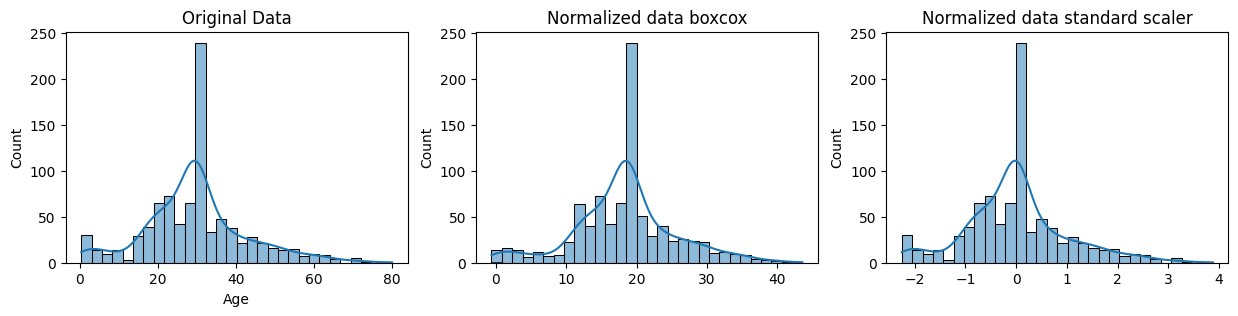

In [22]:
from scipy import stats
normalized_data1 = stats.boxcox(df.Age)
normalized_data2 =StandardScaler().fit_transform(df[['Age']])
#plot both together to compare
fig, ax=plt.subplots(1, 3, figsize=(15, 3))
sns.histplot(df.Age, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data1, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data boxcox")
sns.histplot(normalized_data2, ax=ax[2], kde=True, legend=False)
ax[2].set_title("Normalized data standard scaler")
plt.show()



In [23]:
# Min max normalization
df2['Age'] = MinMaxScaler().fit_transform(df2[['Age']])  # input need to be dataframe, lower 0, upper 1 default
# df2['Age'] = StandardScaler().fit_transform(df2[['Age']])  # z-score scaler mean 0, std 1
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_missing
0,0,3,male,0.271174,1,0,7.2500,NaN,S,0
1,1,1,female,0.472229,1,0,71.2833,C85,C,1
2,1,3,female,0.321438,0,0,7.9250,NaN,S,0
3,1,1,female,0.434531,1,0,53.1000,C123,S,1
4,0,3,male,0.434531,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0,0,13.0000,NaN,S,0
887,1,1,female,0.233476,0,0,30.0000,B42,S,1
888,0,3,female,0.367921,1,2,23.4500,NaN,S,0
889,1,1,male,0.321438,0,0,30.0000,C148,C,1


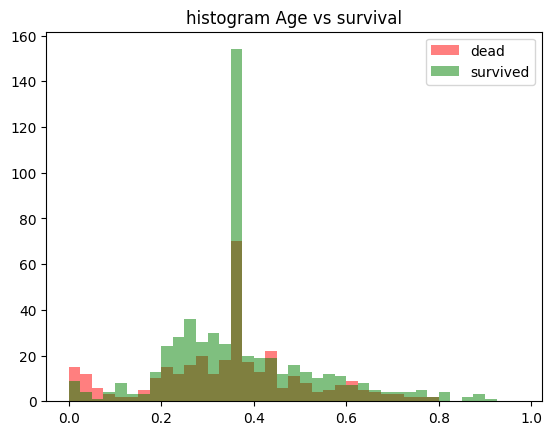

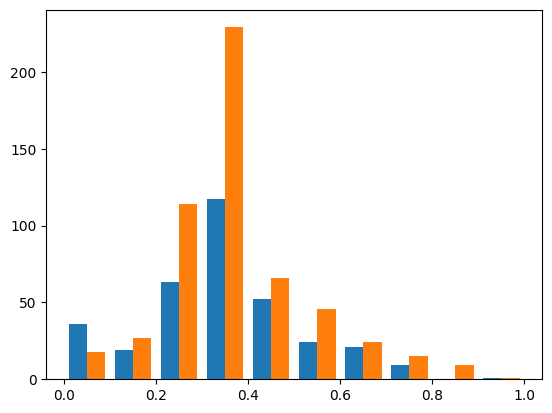

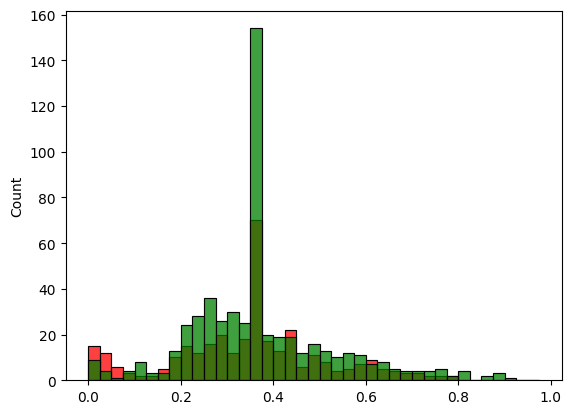

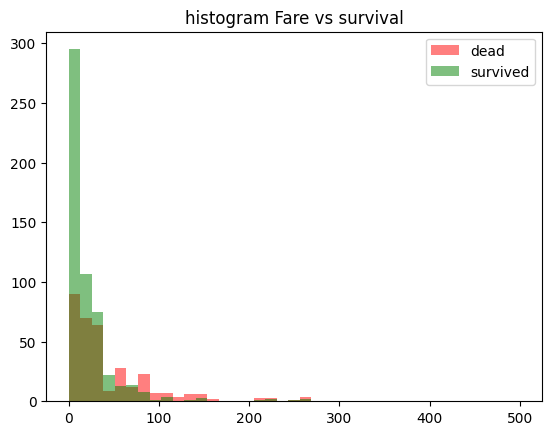

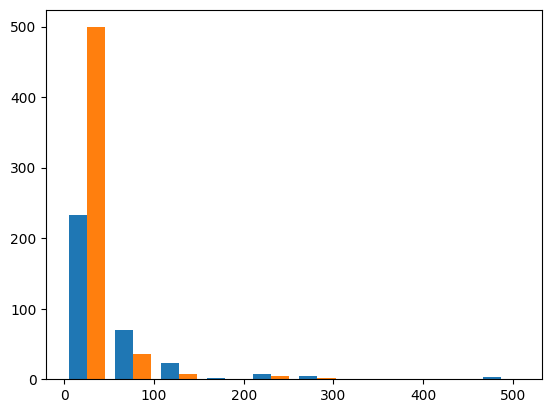

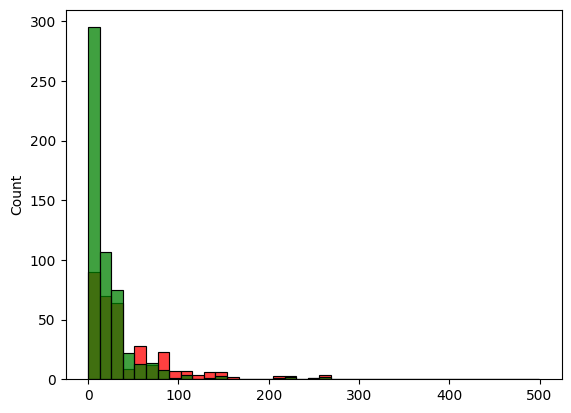

In [24]:
# plot histogram age vs survived and fare vs survived to check any distribution difference
for i in ['Age','Fare']:
    survived = list(df2[df2['Survived'] == 0][i].dropna())
    died = list(df2[df2['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    plt.hist(died, bins=np.arange(xmin, xmax, width), alpha=0.5, color='r')
    plt.hist(survived, bins=np.arange(xmin, xmax, width), alpha=0.5,color='g')
    plt.legend(['dead','survived'])
    plt.title('histogram %s vs survival'%(i))
    plt.show()
    plt.hist([died, survived])
    plt.show()
    sns.histplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.histplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.show()

<Figure size 640x480 with 0 Axes>

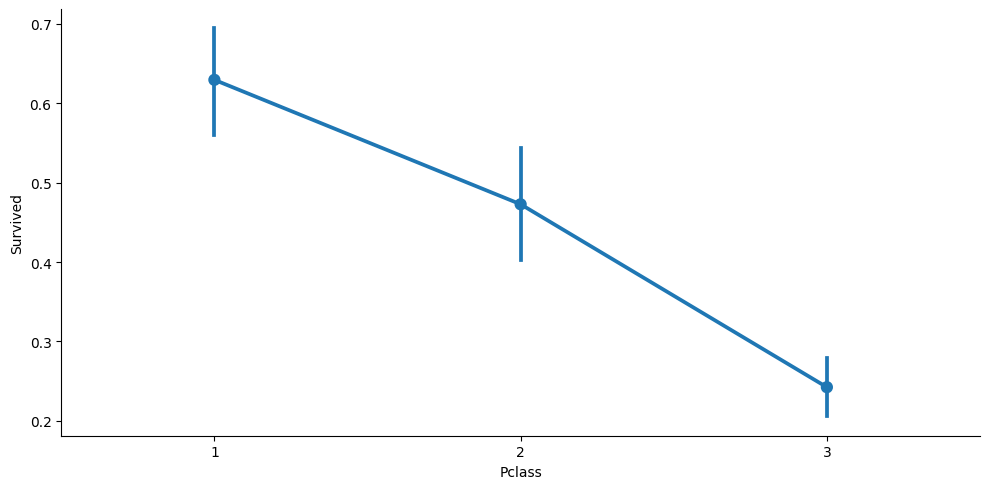

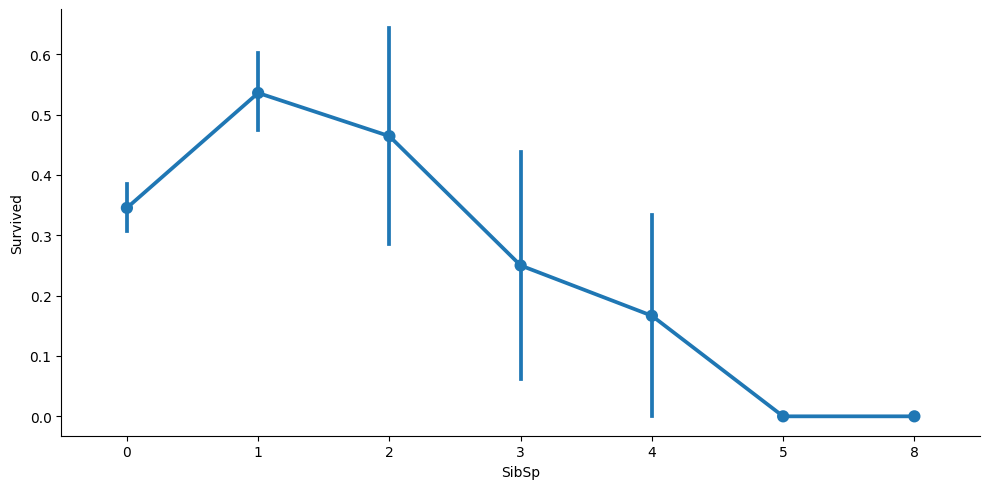

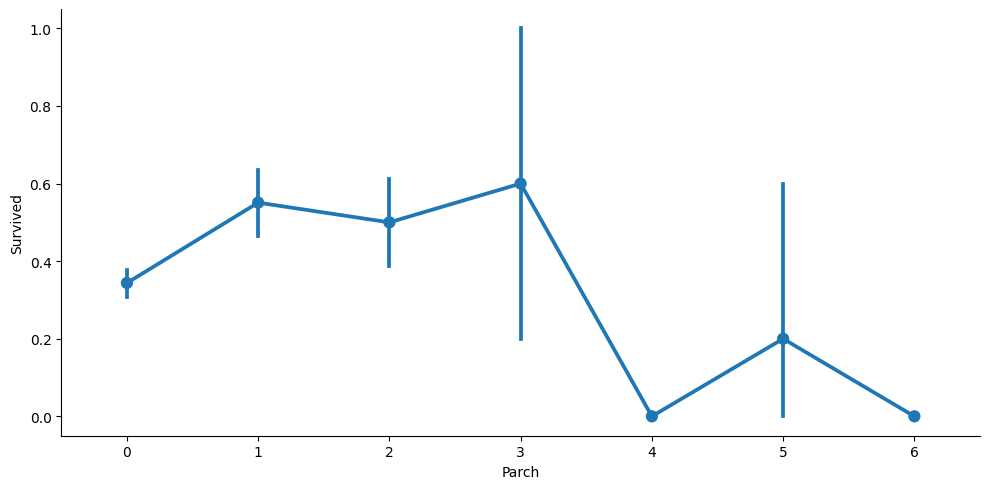

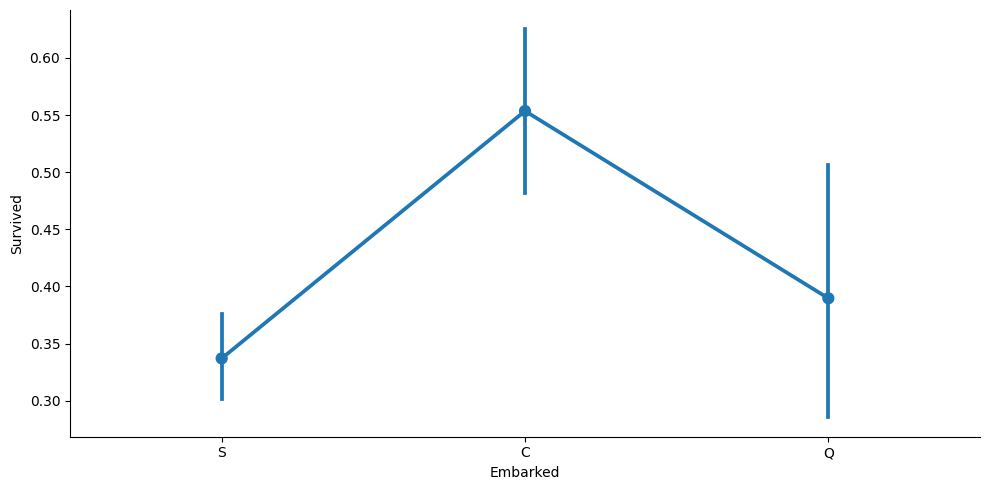

In [25]:
for i,col in enumerate(['Pclass','SibSp','Parch','Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=df2, kind='point', aspect=2)  
    # percent of people survived for each catigorical corresponing value

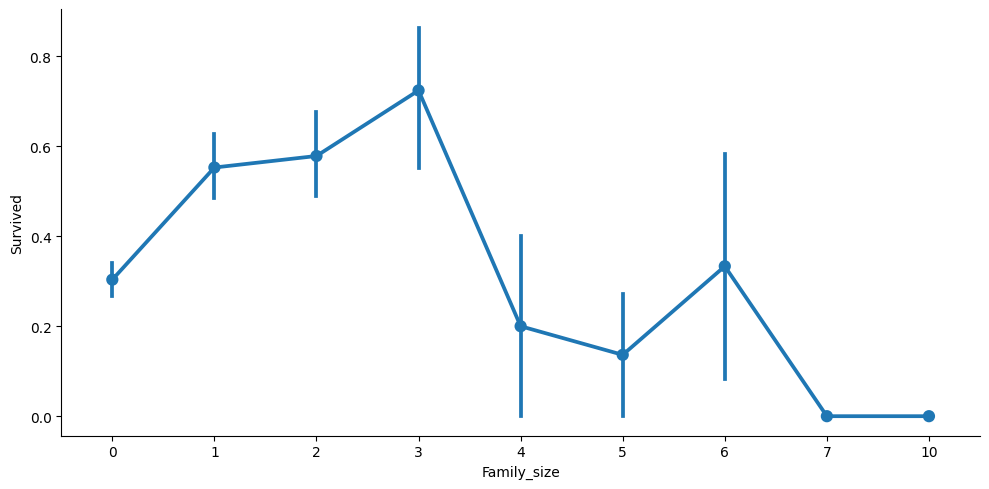

In [26]:
df2['Family_size'] = df2['SibSp'] + df2['Parch']   # merge sibling count and children/parent count into Family size feature
sns.catplot(x='Family_size', y='Survived', data=df2, kind='point', aspect=2) 
# good practice to reduce feature if combined one keep their trend
df2.drop(['SibSp','Parch'], axis=1, inplace=True)

In [27]:
df2.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Cabin_missing,Family_size
0,0,3,male,0.271174,7.2500,NaN,S,0,1
1,1,1,female,0.472229,71.2833,C85,C,1,1
2,1,3,female,0.321438,7.9250,NaN,S,0,0
3,1,1,female,0.434531,53.1000,C123,S,1,1
4,0,3,male,0.434531,8.0500,NaN,S,0,0


<Figure size 640x480 with 0 Axes>

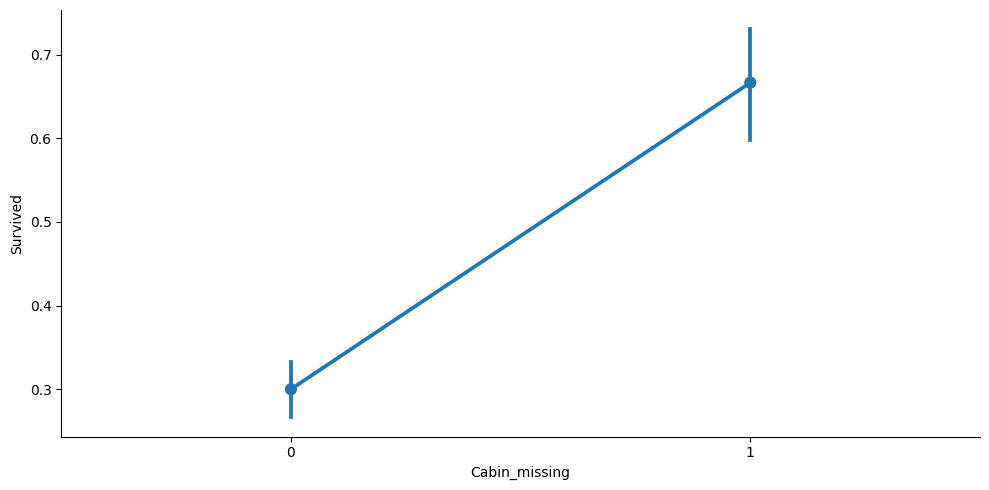

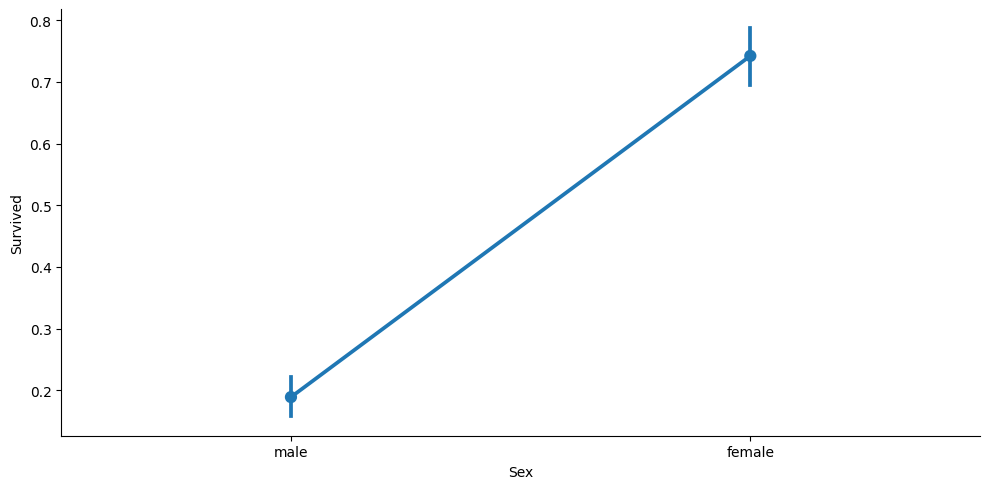

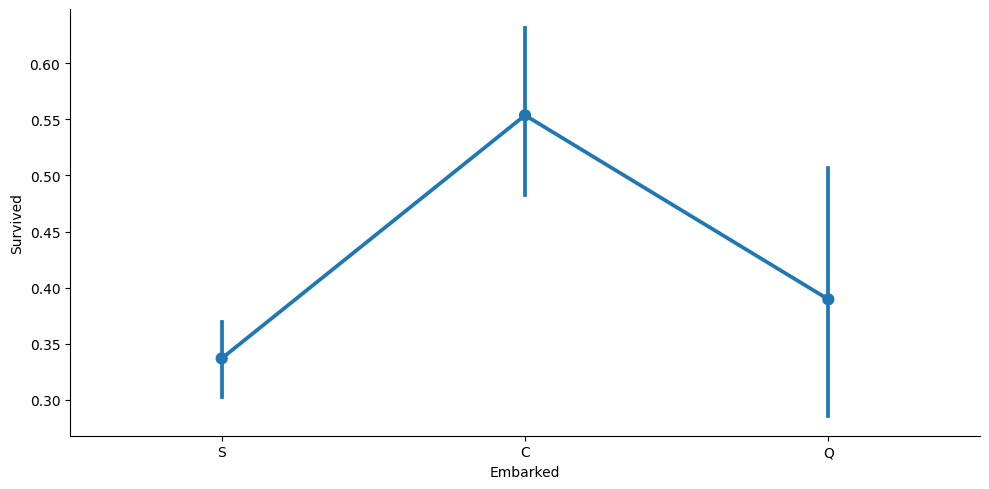

In [28]:
for i,col in enumerate(['Cabin_missing','Sex','Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=df2, kind='point', aspect=2)  

In [29]:
df2.pivot_table('Survived', index='Sex', columns=['Embarked','Cabin_missing'], aggfunc='count')
# show sub table with row index and selected columns, discover embark has less effect due to sex and cabin underlying cause

Embarked        C       Q       S    
Cabin_missing   0   1   0  1    0   1
Sex                                  
female         36  37  34  2  147  56
male           63  32  39  2  368  73

In [30]:
df2

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Cabin_missing,Family_size
0,0,3,male,0.271174,7.2500,NaN,S,0,1
1,1,1,female,0.472229,71.2833,C85,C,1,1
2,1,3,female,0.321438,7.9250,NaN,S,0,0
3,1,1,female,0.434531,53.1000,C123,S,1,1
4,0,3,male,0.434531,8.0500,NaN,S,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,13.0000,NaN,S,0,0
887,1,1,female,0.233476,30.0000,B42,S,1,0
888,0,3,female,0.367921,23.4500,NaN,S,0,3
889,1,1,male,0.321438,30.0000,C148,C,1,0


In [31]:
# handling categorical data
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
df3,df4,df5,df6,df7, df8=df2.copy(),df2.copy(),df2.copy(),df2.copy(),df2.copy(),df2.copy()
categorical_cols = [col for col in df3.columns if df3[col].nunique() < 10 and df3[col].dtype == "object"]
df3=df3.select_dtypes(exclude=['object'])
ordinal_encoder = OrdinalEncoder()     # conver to integer
df4[categorical_cols] = ordinal_encoder.fit_transform(df4[categorical_cols])
# label_X_valid[categorical_cols] = ordinal_encoder.transform(X_valid[categorical_cols])     # don't fit, otherwise cause leakage
df4

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Cabin_missing,Family_size
0,0,3,1.0,0.271174,7.2500,NaN,2.0,0,1
1,1,1,0.0,0.472229,71.2833,C85,0.0,1,1
2,1,3,0.0,0.321438,7.9250,NaN,2.0,0,0
3,1,1,0.0,0.434531,53.1000,C123,2.0,1,1
4,0,3,1.0,0.434531,8.0500,NaN,2.0,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,0.334004,13.0000,NaN,2.0,0,0
887,1,1,0.0,0.233476,30.0000,B42,2.0,1,0
888,0,3,0.0,0.367921,23.4500,NaN,2.0,0,3
889,1,1,1.0,0.321438,30.0000,C148,0.0,1,0


In [32]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)  # handle_unknown='ignore' to avoid errors when validation data contains new classes 
    # sparse=False makes encoded columns return as a numpy array (instead of a sparse matrix,recoding index with nonzero values).
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df5[categorical_cols]))
OH_cols.index = df5.index
df5 = pd.concat([df5.drop(categorical_cols, axis=1), OH_cols], axis=1)
df5

,Survived,Pclass,Age,Fare,Cabin,Cabin_missing,Family_size,0,1,2,3,4,5
0,0,3,0.271174,7.2500,NaN,0,1,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,0.472229,71.2833,C85,1,1,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,0.321438,7.9250,NaN,0,0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.434531,53.1000,C123,1,1,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3,0.434531,8.0500,NaN,0,0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0.334004,13.0000,NaN,0,0,0.0,1.0,0.0,0.0,1.0,0.0
887,1,1,0.233476,30.0000,B42,1,0,1.0,0.0,0.0,0.0,1.0,0.0
888,0,3,0.367921,23.4500,NaN,0,3,1.0,0.0,0.0,0.0,1.0,0.0
889,1,1,0.321438,30.0000,C148,1,0,0.0,1.0,1.0,0.0,0.0,0.0


In [33]:
OH_cols =pd.get_dummies(df6[categorical_cols])    # dummy_na=True  add a column indicate if nan value
OH_cols.index = df5.index
df6 = pd.concat([df6.drop(categorical_cols, axis=1), OH_cols], axis=1)
df6


,Survived,Pclass,Age,Fare,Cabin,Cabin_missing,Family_size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0.271174,7.2500,NaN,0,1,0,1,0,0,1
1,1,1,0.472229,71.2833,C85,1,1,1,0,1,0,0
2,1,3,0.321438,7.9250,NaN,0,0,1,0,0,0,1
3,1,1,0.434531,53.1000,C123,1,1,1,0,0,0,1
4,0,3,0.434531,8.0500,NaN,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0.334004,13.0000,NaN,0,0,0,1,0,0,1
887,1,1,0.233476,30.0000,B42,1,0,1,0,0,0,1
888,0,3,0.367921,23.4500,NaN,0,3,1,0,0,0,1
889,1,1,0.321438,30.0000,C148,1,0,0,1,1,0,0


In [34]:
c = df7.Embarked.astype('category')
d = dict(enumerate(c.cat.categories))
print(d)
df7['Embarked'] = df7.Embarked.astype('category').cat.codes
df7['Embarked_back'] = df7.Embarked.map(d)
df7

{0: 'C', 1: 'Q', 2: 'S'}


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Cabin_missing,Family_size,Embarked_back
0,0,3,male,0.271174,7.2500,NaN,2,0,1,S
1,1,1,female,0.472229,71.2833,C85,0,1,1,C
2,1,3,female,0.321438,7.9250,NaN,2,0,0,S
3,1,1,female,0.434531,53.1000,C123,2,1,1,S
4,0,3,male,0.434531,8.0500,NaN,2,0,0,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,13.0000,NaN,2,0,0,S
887,1,1,female,0.233476,30.0000,B42,2,1,0,S
888,0,3,female,0.367921,23.4500,NaN,2,0,3,S
889,1,1,male,0.321438,30.0000,C148,0,1,0,C


In [35]:
for colname in df8.select_dtypes("object"):
    df8[colname], _ = df8[colname].factorize()  # _ is the index (categorical value) mapping to transformed code 0,1,...
df8

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Cabin_missing,Family_size
0,0,3,0,0.271174,7.2500,-1,0,0,1
1,1,1,1,0.472229,71.2833,0,1,1,1
2,1,3,1,0.321438,7.9250,-1,0,0,0
3,1,1,1,0.434531,53.1000,1,0,1,1
4,0,3,0,0.434531,8.0500,-1,0,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0.334004,13.0000,-1,0,0,0
887,1,1,1,0.233476,30.0000,145,0,1,0
888,0,3,1,0.367921,23.4500,-1,0,0,3
889,1,1,0,0.321438,30.0000,146,1,1,0


In [36]:
gender_num = {'male': 0, 'female': 1}
df2['Sex'] = df2['Sex'].map(gender_num)
df2.drop(['Embarked','Cabin'], axis=1, inplace=True)
df2.head(500)

,Survived,Pclass,Sex,Age,Fare,Cabin_missing,Family_size
0,0,3,0,0.271174,7.2500,0,1
1,1,1,1,0.472229,71.2833,1,1
2,1,3,1,0.321438,7.9250,0,0
3,1,1,1,0.434531,53.1000,1,1
4,0,3,0,0.434531,8.0500,0,0
...,...,...,...,...,...,...,...
495,0,3,0,0.367921,14.4583,0,0
496,1,1,1,0.673285,78.2667,1,1
497,0,3,0,0.367921,15.1000,0,0
498,0,1,1,0.308872,151.5500,1,3


In [37]:
df2.to_csv('data/titanic_cleaned.csv', index=False)

## Feature Engineering

In [38]:
# Calculate Mutual Information Score
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
X=df2.copy()
y=X.pop('Survived')
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
mi_score = mutual_info_classif(X, y)    # mutual_info_regression for regression
mi_score =pd.Series(mi_score, name="MI Scores", index=X.columns).sort_values(ascending=False)
mi_score

Sex              0.159542
Fare             0.135614
Family_size      0.043420
Pclass           0.036214
Cabin_missing    0.035867
Age              0.020063
Name: MI Scores, dtype: float64

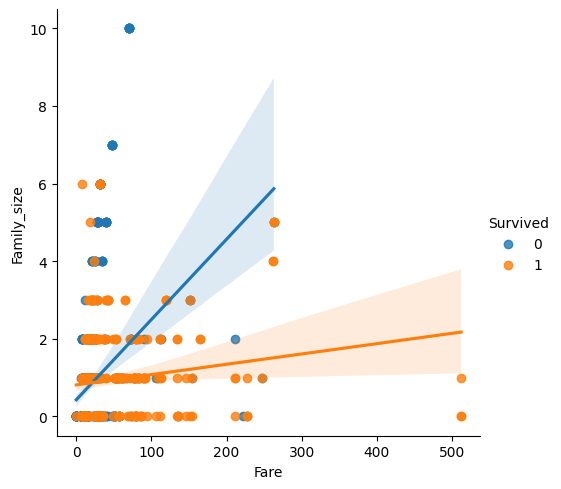

In [39]:
# Data visualization is a great follow-up to a utility ranking. 
sns.lmplot(x="Fare", y="Family_size", hue="Survived", data=df2)

<Figure size 1000x600 with 0 Axes>

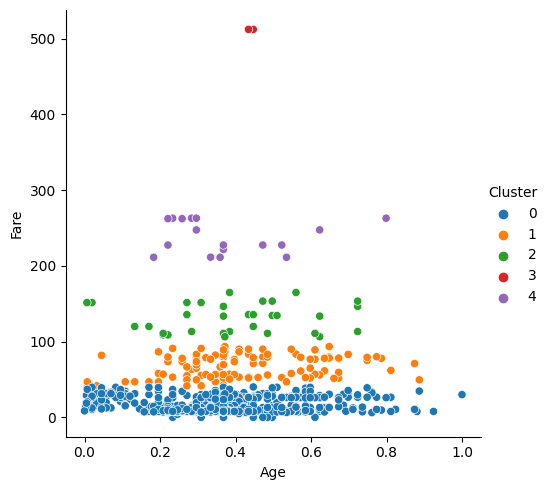

In [40]:
# K means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")
plt.figure(figsize=(10,6))
sns.relplot(x="Age", y="Fare", hue="Cluster", data=X)

In [41]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

          PC1       PC2       PC3
0   -0.006922 -0.513826 -0.081018
1    0.251501  0.753411  0.086781
2   -0.983976 -0.295573 -0.060015
3    0.177671  0.394161  0.058512
4   -0.986067 -0.289601  0.052929
..        ...       ...       ...
886 -0.963417 -0.195242 -0.050083
887 -0.891265  0.136415 -0.159325
888  2.014741 -0.598598  0.065030
889 -0.893291  0.139146 -0.071429
890 -0.986432 -0.296679  0.015415

[891 rows x 3 columns]
                  PC1       PC2       PC3
Age         -0.023031  0.031039  0.999253
Family_size  0.978670 -0.203399  0.028875
Fare         0.204144  0.978604 -0.025693
     Pclass  Sex       Age   Fare  Cabin_missing  Family_size Cluster
863       3    1  0.367921  69.55              0           10       1
159       3    0  0.367921  69.55              0           10       1
846       3    0  0.367921  69.55              0           10       1
324       3    0  0.367921  69.55              0           10       1
792       3    1  0.367921  69.55              0  

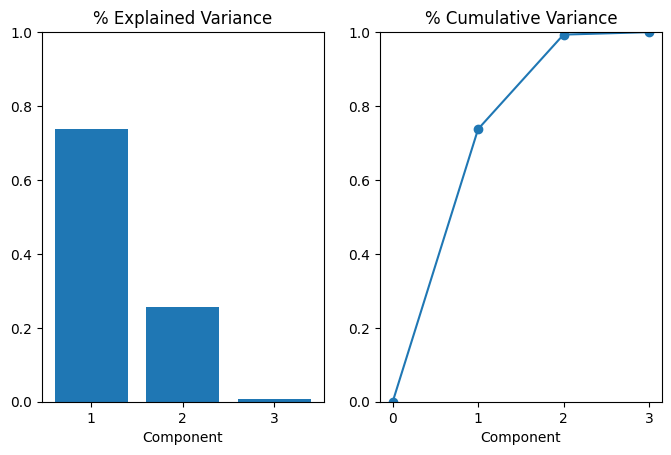

In [42]:
#PCA
from sklearn.decomposition import PCA
X_scaled = (X['Fare'] - X['Fare'].mean(axis=0)) / X['Fare'].std(axis=0)     # don't apply pca on categorical feature
X_s = pd.concat([X[['Age','Family_size']], X_scaled], axis=1)
pca = PCA()
X_pca = pca.fit_transform(X_s)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
print(X_pca)
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings, (7,7) array
    columns=component_names,  # so the columns are the principal components
    index=X_s.columns,  # and the rows are the original features
)
print(loadings)
plot_variance(pca)

idx = X_pca["PC1"].sort_values(ascending=False).index
print(X.loc[idx])    # Show dataframe sorted by PC1


In [43]:
# Target encoding
from category_encoders import CountEncoder, MEstimateEncoder     # need pip install    MEstimateEncoder for regression target 
df = pd.read_csv('data/titanic.csv')
print(df["Cabin"].nunique())   # 147, to many categories to use onehot, and label encoding not meaningful
X = df.copy()
y = X.pop('Survived')
X_encode = X.sample(frac=0.25)     # start by creating a 25% split to train the target encoder.
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]
encoder = MEstimateEncoder(cols=["Cabin"], m=5.0)    # smoothed mean encoding 
#encoder = CountEncoder(cols=["Cabin"])    # bin counting for boolean target
encoder.fit(X_encode, y_encode)
X_train = encoder.transform(X_pretrain)
X_train

147


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0.332282,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.430493,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0.332282,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.430493,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0.332282,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,0.332282,Q
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0.430493,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0.332282,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,0.430493,C


# Sampling Data to train, validate, test sets

In [44]:
# train(split into x-fold cross-validation), validation, test split
features = df2.drop('Survived', axis=1)
labels = df2['Survived']
# split data   random sampling without replacement, default test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=8) 
# stratified sampling based on specified column value distribution
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=8, stratify=y_test)
print(len(labels), len(y_train), len(y_val), len(y_test))

891 534 178 179


# Various algorithm

<div>
<img src="img/choose_model.png" width="800"/>
</div>

In [45]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

## Logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression
LogisticRegression().get_params()   # workable parameter, C is a regularization term controlling how close to fit training data
    # C = 1/λ   C value [0, +inf)   # higher C less regularization, more likely overfit

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [47]:
dir(LogisticRegression)  # attribute and method

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'decision_function',
 'densify',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'sparsify']

In [48]:
lr = LogisticRegression(max_iter=1000)
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_train, y_train)
print_results(cv)

BEST PARAMS: {'C': 10}

0.682 (+/-0.063) for {'C': 0.001}
0.713 (+/-0.077) for {'C': 0.01}
0.786 (+/-0.031) for {'C': 0.1}
0.8 (+/-0.111) for {'C': 1}
0.802 (+/-0.098) for {'C': 10}
0.8 (+/-0.099) for {'C': 100}
0.8 (+/-0.099) for {'C': 1000}


In [49]:
cv.best_estimator_

LogisticRegression(C=10, max_iter=1000)

In [50]:
joblib.dump(cv.best_estimator_,'./ml practice models/LR_model.pkl')

['./ml practice models/LR_model.pkl']

## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [52]:
dt = DecisionTreeClassifier(random_state=8)
parameters={'max_depth': [2, 3, 5, 10]}
cv = GridSearchCV(dt, parameters, cv=5)
cv.fit(X_train, y_train)
print_results(cv)

BEST PARAMS: {'max_depth': 5}

0.777 (+/-0.071) for {'max_depth': 2}
0.8 (+/-0.052) for {'max_depth': 3}
0.82 (+/-0.081) for {'max_depth': 5}
0.794 (+/-0.096) for {'max_depth': 10}


In [53]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=8)

In [54]:
dt2 = DecisionTreeClassifier(max_depth=3, random_state=8)
dt2.fit(X_train, y_train)
dt2.score(X_test, y_test)

0.7877094972067039

[Text(0.5, 0.875, 'Sex <= 0.5\ngini = 0.467\nsamples = 534\nvalue = [336, 198]\nclass = survived'),
 Text(0.25, 0.625, 'Cabin_missing <= 0.5\ngini = 0.286\nsamples = 347\nvalue = [287, 60]\nclass = survived'),
 Text(0.125, 0.375, 'Age <= 0.064\ngini = 0.198\nsamples = 279\nvalue = [248, 31]\nclass = survived'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = survived'),
 Text(0.1875, 0.125, 'gini = 0.175\nsamples = 269\nvalue = [243, 26]\nclass = survived'),
 Text(0.375, 0.375, 'Age <= 0.215\ngini = 0.489\nsamples = 68\nvalue = [39, 29]\nclass = survived'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = not survived'),
 Text(0.4375, 0.125, 'gini = 0.472\nsamples = 63\nvalue = [39, 24]\nclass = survived'),
 Text(0.75, 0.625, 'Pclass <= 2.5\ngini = 0.387\nsamples = 187\nvalue = [49, 138]\nclass = not survived'),
 Text(0.625, 0.375, 'Age <= 0.026\ngini = 0.112\nsamples = 101\nvalue = [6, 95]\nclass = not survived'),
 Text(0.5625, 0.125, 'gin

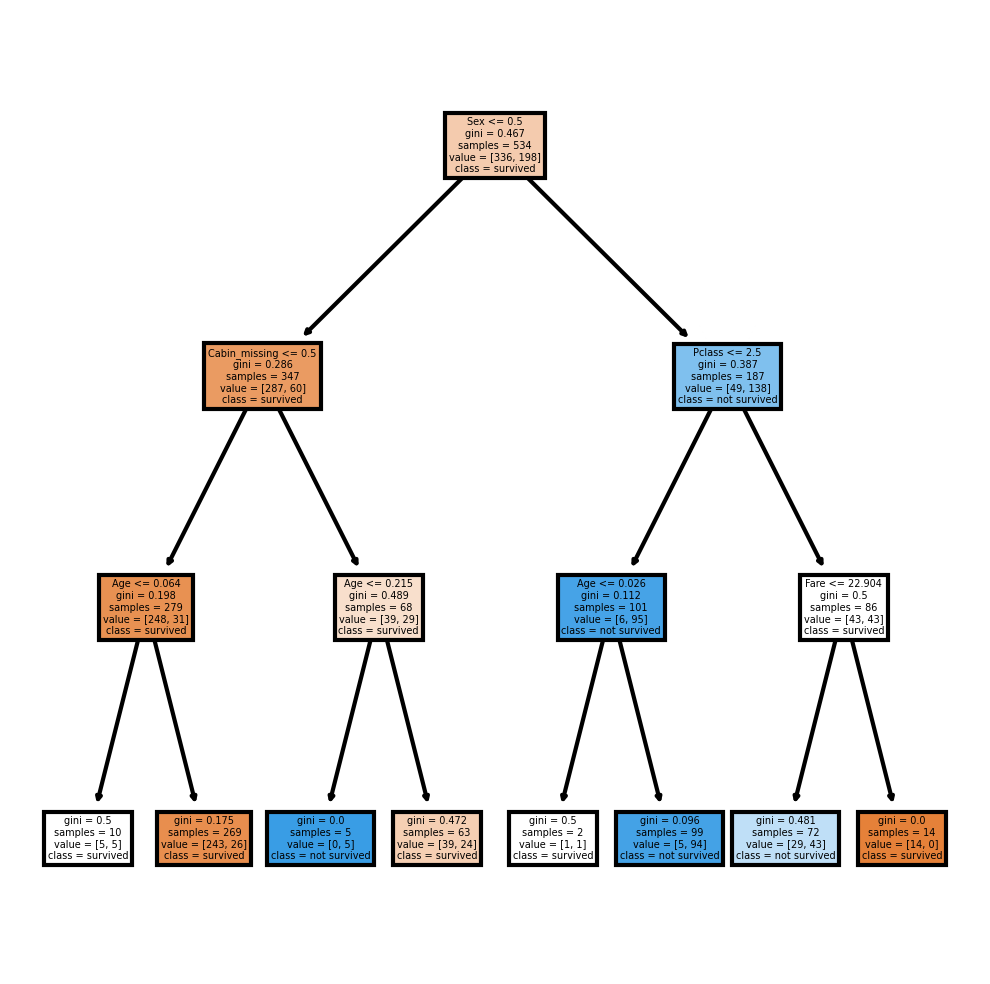

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
#class_names=['survived, not survived'], feature_names=list(X_train.columns), 
tree.plot_tree(dt2, feature_names=list(X_train.columns), class_names=['survived','not survived'], filled=True)

In [56]:
joblib.dump(cv.best_estimator_,'./ml practice models/LR_model.pkl')

['./ml practice models/LR_model.pkl']

## suport Vector Machine

In [57]:
from sklearn.svm import SVC
SVC().get_params()   
# most important parameter: C (regularization) and kernel (different kernel to transform function to higher dimention)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [58]:
svc = SVC()
parameters={'C': [0.1, 1, 10], 'kernel':['linear','rbf']}
cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_train, y_train)
print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.796 (+/-0.1) for {'C': 0.1, 'kernel': 'linear'}
0.676 (+/-0.058) for {'C': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.1) for {'C': 1, 'kernel': 'linear'}
0.672 (+/-0.041) for {'C': 1, 'kernel': 'rbf'}
0.796 (+/-0.1) for {'C': 10, 'kernel': 'linear'}
0.672 (+/-0.044) for {'C': 10, 'kernel': 'rbf'}


In [59]:
cv.best_estimator_

SVC(C=0.1, kernel='linear')

In [60]:
joblib.dump(cv.best_estimator_,'./ml practice models/SVM_model.pkl')

['./ml practice models/SVM_model.pkl']

## Multilayer Perceptron Algorithm

In [61]:
from sklearn.neural_network import MLPRegressor, MLPClassifier
print(MLPRegressor().get_params())     # most important parameter: activation, hidden_layer_size, and learning_rate
print(MLPClassifier().get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [62]:
mlp = MLPClassifier(max_iter=1000)
parameters={'hidden_layer_sizes': [(10,), (50,), (100,)], 'activation':['relu','tanh', 'logistic'], 
            'learning_rate': ['constant', 'invscaling', 'adaptive']}
cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(X_train, y_train)
print_results(cv)

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}

0.781 (+/-0.091) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.788 (+/-0.085) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.803 (+/-0.076) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.798 (+/-0.069) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.798 (+/-0.084) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.802 (+/-0.046) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.8 (+/-0.057) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.796 (+/-0.083) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.818 (+/-0.094) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learnin

In [63]:
cv.best_estimator_

MLPClassifier(learning_rate='adaptive', max_iter=1000)

In [64]:
joblib.dump(cv.best_estimator_,'./ml practice models/MLP_model.pkl')

['./ml practice models/MLP_model.pkl']

## Random Forest (Bagging)

In [65]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, BaggingRegressor
print(RandomForestClassifier().get_params())     # important param: n_estimators, max depth
print(RandomForestRegressor().get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [66]:
rf = RandomForestClassifier(random_state=8)   # use random_state to fix result from randomness
parameters={'n_estimators': [5, 50, 250], 'max_depth': [2, 4, 8, 16, 32, None]}   # None: go till max accuracy depth
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train)
print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 250}

0.781 (+/-0.057) for {'max_depth': 2, 'n_estimators': 5}
0.785 (+/-0.063) for {'max_depth': 2, 'n_estimators': 50}
0.775 (+/-0.049) for {'max_depth': 2, 'n_estimators': 250}
0.805 (+/-0.055) for {'max_depth': 4, 'n_estimators': 5}
0.811 (+/-0.079) for {'max_depth': 4, 'n_estimators': 50}
0.811 (+/-0.081) for {'max_depth': 4, 'n_estimators': 250}
0.8 (+/-0.072) for {'max_depth': 8, 'n_estimators': 5}
0.832 (+/-0.103) for {'max_depth': 8, 'n_estimators': 50}
0.837 (+/-0.084) for {'max_depth': 8, 'n_estimators': 250}
0.794 (+/-0.075) for {'max_depth': 16, 'n_estimators': 5}
0.815 (+/-0.096) for {'max_depth': 16, 'n_estimators': 50}
0.811 (+/-0.079) for {'max_depth': 16, 'n_estimators': 250}
0.794 (+/-0.07) for {'max_depth': 32, 'n_estimators': 5}
0.818 (+/-0.079) for {'max_depth': 32, 'n_estimators': 50}
0.813 (+/-0.073) for {'max_depth': 32, 'n_estimators': 250}
0.794 (+/-0.07) for {'max_depth': None, 'n_estimators': 5}
0.818 (+/-0.079)

In [67]:
cv.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=250, random_state=8)

In [68]:
joblib.dump(cv.best_estimator_,'./ml practice models/RF_model.pkl')

['./ml practice models/RF_model.pkl']

## Boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
print(GradientBoostingClassifier().get_params())   # most important param: n_estimators, max_depth, learning_rate (constant)
print(GradientBoostingRegressor().get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [70]:
X_train.isnull().sum()

Pclass           0
Sex              0
Age              0
Fare             0
Cabin_missing    0
Family_size      0
dtype: int64

In [71]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=8,n_jobs=6)   # n_jobs: cpu number of cores to build your models faster
parameters={'n_estimators': [50, 200, 500],'learning_rate': [0.01, 0.1, 1],'booster':['gbtree', 'gblinear','dart']} 
# cv = RandomizedSearchCV(xg, parameters, cv=5, n_iter=10)    #  n_iter: number of models to try
cv = GridSearchCV(xg, parameters, cv=5)
cv.fit(X_train, y_train)
print_results(cv)
#print(cv.best_estimator_)

# xg_gpu = XGBClassifier(tree_method='gpu_hist', gpu_id=0)    # use gpu
# xg_gpu.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)],verbose=False)   # need validation set if using early_stopping_rounds 
#     # early_stopping_rounds: causes the model to stop iterating when the validation score stops improving 
# predictions = xg_gpu.predict(X_val)
# print("Accuracy: " + str(accuracy_score(predictions, y_val)))


BEST PARAMS: {'booster': 'gbtree', 'learning_rate': 0.01, 'n_estimators': 500}

0.815 (+/-0.084) for {'booster': 'gbtree', 'learning_rate': 0.01, 'n_estimators': 50}
0.822 (+/-0.051) for {'booster': 'gbtree', 'learning_rate': 0.01, 'n_estimators': 200}
0.841 (+/-0.066) for {'booster': 'gbtree', 'learning_rate': 0.01, 'n_estimators': 500}
0.841 (+/-0.066) for {'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 50}
0.817 (+/-0.072) for {'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 200}
0.807 (+/-0.067) for {'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 500}
0.798 (+/-0.053) for {'booster': 'gbtree', 'learning_rate': 1, 'n_estimators': 50}
0.802 (+/-0.061) for {'booster': 'gbtree', 'learning_rate': 1, 'n_estimators': 200}
0.803 (+/-0.051) for {'booster': 'gbtree', 'learning_rate': 1, 'n_estimators': 500}
0.751 (+/-0.061) for {'booster': 'gblinear', 'learning_rate': 0.01, 'n_estimators': 50}
0.801 (+/-0.072) for {'booster': 'gblinear', 'learning_rate': 0.

In [72]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
print(GradientBoostingClassifier().get_params())   # most important param: n_estimators, max_depth, learning_rate (constant)
print(GradientBoostingRegressor().get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [73]:
gb = GradientBoostingClassifier(random_state=8)
parameters={'n_estimators': [5, 50, 250, 500], 'max_depth': [1, 3, 5, 7, 9], 'learning_rate': [0.01, 0.1, 1, 10, 100]} 
cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X_train, y_train)
print_results(cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

0.629 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.796 (+/-0.1) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.798 (+/-0.104) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.817 (+/-0.092) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.629 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.792 (+/-0.037) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.837 (+/-0.082) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.841 (+/-0.072) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.629 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.817 (+/-0.067) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.822 (+/-0.063) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.837 (+/-0.048) for {'learning_rate

In [74]:
cv.best_estimator_

GradientBoostingClassifier(n_estimators=50, random_state=8)

In [75]:
joblib.dump(cv.best_estimator_,'./ml practice models/GB_model.pkl')

['./ml practice models/GB_model.pkl']

<div>
<img src="img/model_comparison.png" width="800"/>
</div>

## Stacking

In [76]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
estimators = [('gb', GradientBoostingClassifier()), ('rf', RandomForestClassifier())]
StackingClassifier(estimators=estimators).get_params() # has hyperparameter for both stacking and base models
# most important param: estimators(list of base model), final_estimator(default logistic regression), 
# passthrough(if false final model only train on base model predictions, if true parse in training data as well)

{'cv': None,
 'estimators': [('gb', GradientBoostingClassifier()),
  ('rf', RandomForestClassifier())],
 'final_estimator': None,
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'gb': GradientBoostingClassifier(),
 'rf': RandomForestClassifier(),
 'gb__ccp_alpha': 0.0,
 'gb__criterion': 'friedman_mse',
 'gb__init': None,
 'gb__learning_rate': 0.1,
 'gb__loss': 'log_loss',
 'gb__max_depth': 3,
 'gb__max_features': None,
 'gb__max_leaf_nodes': None,
 'gb__min_impurity_decrease': 0.0,
 'gb__min_samples_leaf': 1,
 'gb__min_samples_split': 2,
 'gb__min_weight_fraction_leaf': 0.0,
 'gb__n_estimators': 100,
 'gb__n_iter_no_change': None,
 'gb__random_state': None,
 'gb__subsample': 1.0,
 'gb__tol': 0.0001,
 'gb__validation_fraction': 0.1,
 'gb__verbose': 0,
 'gb__warm_start': False,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None

In [77]:
estimators = [('gb', GradientBoostingClassifier()), ('rf', RandomForestClassifier())]
sc = StackingClassifier(estimators=estimators)
parameters={'gb__n_estimators': [50, 100], 'rf__n_estimators': [50, 100], 'passthrough': [True, False],
               'final_estimator': [LogisticRegression(C=0.1), LogisticRegression(C=1), LogisticRegression(C=10)]
           } 
cv = GridSearchCV(sc, parameters, cv=5)
cv.fit(X_train, y_train)
print_results(cv)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

BEST PARAMS: {'final_estimator': LogisticRegression(C=10), 'gb__n_estimators': 100, 'passthrough': False, 'rf__n_estimators': 50}

0.815 (+/-0.077) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': True, 'rf__n_estimators': 50}
0.815 (+/-0.068) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': True, 'rf__n_estimators': 100}
0.83 (+/-0.073) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': False, 'rf__n_estimators': 50}
0.826 (+/-0.067) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 50, 'passthrough': False, 'rf__n_estimators': 100}
0.824 (+/-0.059) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 100, 'passthrough': True, 'rf__n_estimators': 50}
0.822 (+/-0.056) for {'final_estimator': LogisticRegression(C=0.1), 'gb__n_estimators': 100, 'passthrough': True, 'rf__n_estimators': 100}
0.839 (+/-0.066) for {'final_estimator': 

In [78]:
cv.best_estimator_

StackingClassifier(estimators=[('gb', GradientBoostingClassifier()),
                               ('rf', RandomForestClassifier(n_estimators=50))],
                   final_estimator=LogisticRegression(C=10))

In [79]:
joblib.dump(cv.best_estimator_,'./ml practice models/SC_model.pkl')

['./ml practice models/SC_model.pkl']

<div>
<img src="img/ensemble_comparison.png" width="800"/>
</div>

In [80]:
models = {}
for md in ['LR', 'SVM', 'MLP','RF', 'GB', 'SC']: #, 
    models[md] = joblib.load('./ml practice models/{}_model.pkl'.format(md))
models

{'LR': DecisionTreeClassifier(max_depth=5, random_state=8),
 'SVM': SVC(C=0.1, kernel='linear'),
 'MLP': MLPClassifier(learning_rate='adaptive', max_iter=1000),
 'RF': RandomForestClassifier(max_depth=8, n_estimators=250, random_state=8),
 'GB': GradientBoostingClassifier(n_estimators=50, random_state=8),
 'SC': StackingClassifier(estimators=[('gb', GradientBoostingClassifier()),
                                ('rf', RandomForestClassifier(n_estimators=50))],
                    final_estimator=LogisticRegression(C=10))}

In [81]:
def evaluate_models(name, model, features, labels):
    start = time()
    y_pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, y_pred), 3)
    precision = round(precision_score(labels, y_pred), 3)
    recall = round(recall_score(labels, y_pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name, accuracy, precision, recall, round((end-start)*1000)))

In [82]:
for name, md in models.items():
    evaluate_models(name, md, X_val, y_val)

LR -- Accuracy: 0.809 / Precision: 0.88 / Recall: 0.611 / Latency: 2ms
SVM -- Accuracy: 0.775 / Precision: 0.735 / Recall: 0.694 / Latency: 2ms
MLP -- Accuracy: 0.798 / Precision: 0.773 / Recall: 0.708 / Latency: 1ms
RF -- Accuracy: 0.837 / Precision: 0.852 / Recall: 0.722 / Latency: 20ms
GB -- Accuracy: 0.82 / Precision: 0.857 / Recall: 0.667 / Latency: 1ms
SC -- Accuracy: 0.82 / Precision: 0.845 / Recall: 0.681 / Latency: 7ms


In [83]:
evaluate_models('GB', models['GB'], X_test, y_test)

GB -- Accuracy: 0.821 / Precision: 0.845 / Recall: 0.681 / Latency: 2ms


# Evaluate and Optimizing Model
Bias(mean) vs Variance(spread), low bias/variance is good. High bias is a result of missing relevant relations between features and target(underfitting, model too simple to capture the underlying trend of data). High variance is a result of fitting to random noise(overfitting, model too complex, fits too closerly to a limited set of data). 

total error = bias + variance + irreducible error

Train error will decrease with increasing complexity of model. Test error will first decrease then increase with increasing complexity of model.

Use hyperparameter tuning to tune model for optimal complexity. Or use regularization 
(L1, L2, dropout) to reduce overfitting.

<div>
<img src="img/bias_variance.png" width="500"/>
</div>

In [84]:
df2.head()

,Survived,Pclass,Sex,Age,Fare,Cabin_missing,Family_size
0,0,3,0,0.271174,7.2500,0,1
1,1,1,1,0.472229,71.2833,1,1
2,1,3,1,0.321438,7.9250,0,0
3,1,1,1,0.434531,53.1000,1,1
4,0,3,0,0.434531,8.0500,0,0


In [85]:
cl1 = RandomForestClassifier()
scores = cross_val_score(cl1, X_train, y_train, cv=5)

In [86]:
scores

array([0.81308411, 0.85981308, 0.8317757 , 0.75700935, 0.86792453])

In [87]:
parameters={'n_estimators': [5, 20, 50, 100], 'max_depth': [2, 5, 10, 20, None]}
cv = GridSearchCV(cl1, parameters, cv=5)
cv.fit(X_train, y_train)
print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}

0.757 (+/-0.118) for {'max_depth': 2, 'n_estimators': 5}
0.781 (+/-0.06) for {'max_depth': 2, 'n_estimators': 20}
0.79 (+/-0.064) for {'max_depth': 2, 'n_estimators': 50}
0.786 (+/-0.033) for {'max_depth': 2, 'n_estimators': 100}
0.801 (+/-0.052) for {'max_depth': 5, 'n_estimators': 5}
0.817 (+/-0.093) for {'max_depth': 5, 'n_estimators': 20}
0.813 (+/-0.076) for {'max_depth': 5, 'n_estimators': 50}
0.824 (+/-0.075) for {'max_depth': 5, 'n_estimators': 100}
0.82 (+/-0.065) for {'max_depth': 10, 'n_estimators': 5}
0.828 (+/-0.073) for {'max_depth': 10, 'n_estimators': 20}
0.828 (+/-0.073) for {'max_depth': 10, 'n_estimators': 50}
0.833 (+/-0.076) for {'max_depth': 10, 'n_estimators': 100}
0.787 (+/-0.046) for {'max_depth': 20, 'n_estimators': 5}
0.809 (+/-0.076) for {'max_depth': 20, 'n_estimators': 20}
0.822 (+/-0.085) for {'max_depth': 20, 'n_estimators': 50}
0.815 (+/-0.071) for {'max_depth': 20, 'n_estimators': 100}
0.807 (+/-0.04

In [88]:
cl2 = RandomForestClassifier(n_estimators=5, max_depth=10)
cl2.fit(X_train, y_train)
cl3 = RandomForestClassifier(n_estimators=100, max_depth=10)
cl3.fit(X_train, y_train)
cl4 = RandomForestClassifier(n_estimators=100, max_depth=None)
cl4.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
for mod in [cl2, cl3, cl4]:
    y_pred = mod.predict(X_val)
    accuracy = round(accuracy_score(y_val, y_pred), 3)
    precision = round(precision_score(y_val, y_pred), 3)
    recall = round(recall_score(y_val, y_pred), 3)
    print('MAX DEPTH: {} / # OF EST: {}  --A: {} / P: {} / R: {}'.format(mod.max_depth, mod.n_estimators, accuracy, precision, recall))

MAX DEPTH: 10 / # OF EST: 5  --A: 0.798 / P: 0.773 / R: 0.708
MAX DEPTH: 10 / # OF EST: 100  --A: 0.826 / P: 0.825 / R: 0.722
MAX DEPTH: None / # OF EST: 100  --A: 0.809 / P: 0.806 / R: 0.694


In [90]:
X_val.shape

(178, 6)

In [91]:
y_pred = cl3.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 3) 
for mod in [cl2, cl3, cl4]:
    y_pred_val = mod.predict(X_val)
    precision = round(precision_score(y_val, y_pred_val), 3)
    recall = round(recall_score(y_val, y_pred_val), 3)
    print('MAX DEPTH: {} / # OF EST: {}  --A: {} / P: {} / R: {}'.format(mod.max_depth, mod.n_estimators, accuracy, precision, recall))
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
print('MAX DEPTH: {} / # OF EST: {}  --A: {} / P: {} / R: {}'.format(cl3.max_depth, cl3.n_estimators, accuracy, precision, recall))

MAX DEPTH: 10 / # OF EST: 5  --A: 0.816 / P: 0.773 / R: 0.708
MAX DEPTH: 10 / # OF EST: 100  --A: 0.816 / P: 0.825 / R: 0.722
MAX DEPTH: None / # OF EST: 100  --A: 0.816 / P: 0.806 / R: 0.694
MAX DEPTH: 10 / # OF EST: 100  --A: 0.816 / P: 0.81 / R: 0.708


## Sklearn Pipeline

In [92]:
# ML pipeline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('data/titanic.csv')
y = df.Survived
X = df.drop(['Survived'], axis=1)
categorical_cols = [col for col in X.columns if X[col].nunique() < 10 and X[col].dtype == "object"]
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

# Define a pipeline to search for the best combination of PCA truncation and classifier regularization.
pca = PCA()      
scaler = StandardScaler()

numerical_transformer = SimpleImputer(strategy='constant')
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

rf = RandomForestClassifier(n_estimators=100, random_state=0)

param_grid = {
    "pca__n_components": [2,4,6,8],
    "model__max_depth": [2,5,10,20],      # use prefix name defined in pipeline
}

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ("scaler", scaler), ("pca", pca),
                              ('model', rf)
                             ])
cv = GridSearchCV(my_pipeline, param_grid, cv=5, n_jobs=4)               # searching best parameter with cross validation 
cv.fit(X_train, y_train)
print_results(cv)
print(cv.best_params_)

my_pipeline.fit(X_train, y_train)                                        # basic train/validate
preds = my_pipeline.predict(X_valid)
score = accuracy_score(y_valid, preds)
print('Accuracy:', score)

scores = cross_val_score(my_pipeline, X, y,cv=5, scoring='accuracy')     # cross validation if small dataset
print('Accuracy:', scores.mean())

BEST PARAMS: {'model__max_depth': 5, 'pca__n_components': 4}

0.77 (+/-0.046) for {'model__max_depth': 2, 'pca__n_components': 2}
0.785 (+/-0.062) for {'model__max_depth': 2, 'pca__n_components': 4}
0.784 (+/-0.073) for {'model__max_depth': 2, 'pca__n_components': 6}
0.782 (+/-0.058) for {'model__max_depth': 2, 'pca__n_components': 8}
0.775 (+/-0.047) for {'model__max_depth': 5, 'pca__n_components': 2}
0.792 (+/-0.069) for {'model__max_depth': 5, 'pca__n_components': 4}
0.777 (+/-0.074) for {'model__max_depth': 5, 'pca__n_components': 6}
0.789 (+/-0.065) for {'model__max_depth': 5, 'pca__n_components': 8}
0.757 (+/-0.064) for {'model__max_depth': 10, 'pca__n_components': 2}
0.782 (+/-0.059) for {'model__max_depth': 10, 'pca__n_components': 4}
0.779 (+/-0.059) for {'model__max_depth': 10, 'pca__n_components': 6}
0.792 (+/-0.041) for {'model__max_depth': 10, 'pca__n_components': 8}
0.736 (+/-0.053) for {'model__max_depth': 20, 'pca__n_components': 2}
0.782 (+/-0.049) for {'model__max_dep

Text(0.5, 47.7222222222222, 'Airline')

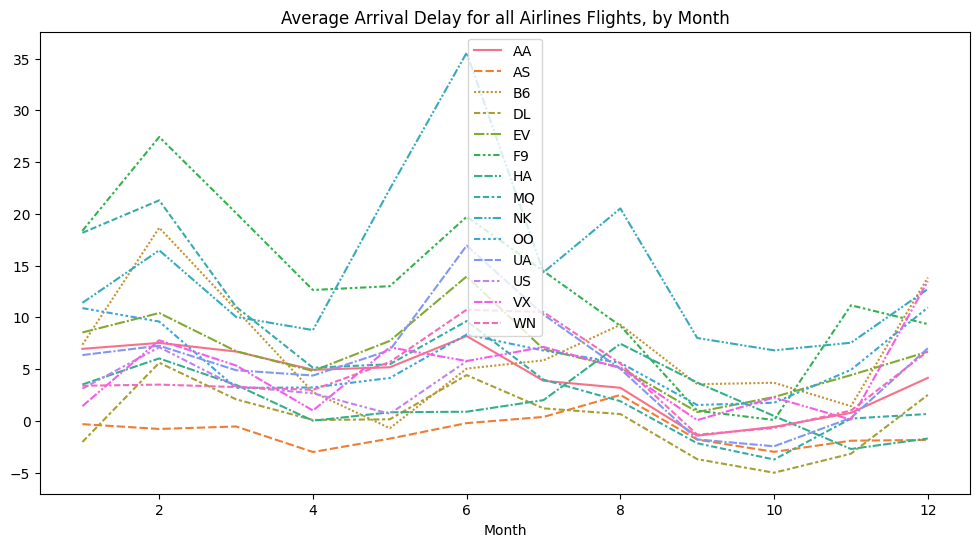

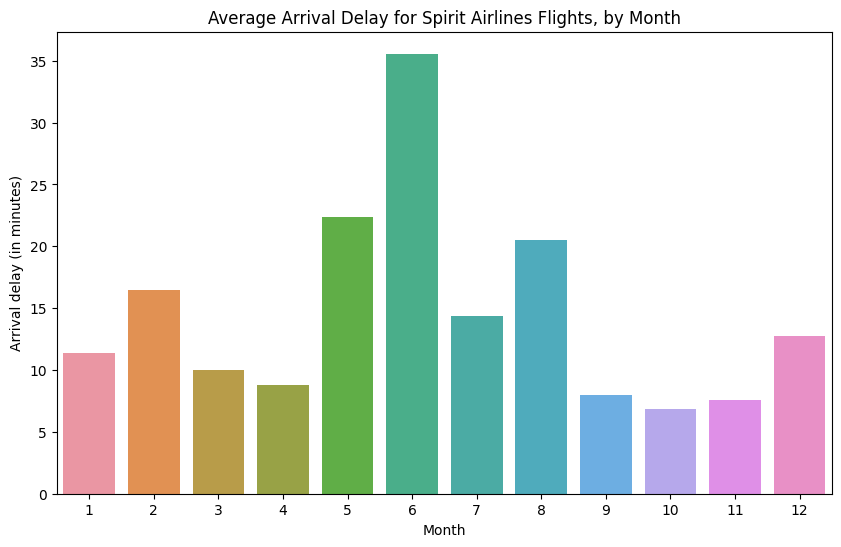

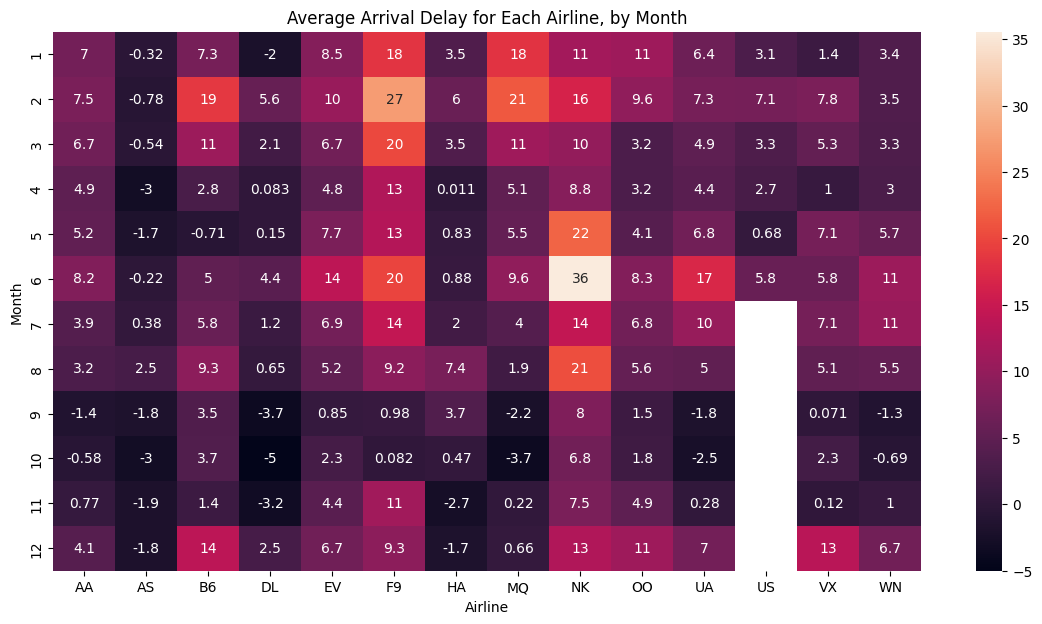

In [93]:
data = pd.read_csv('data/flight_delays.csv', index_col="Month", parse_dates=True)
plt.figure(figsize=(12,6))
plt.title("Average Arrival Delay for all Airlines Flights, by Month")
sns.lineplot(data=data)       
# sns.lineplot(data=data['Despacito'], label="Despacito")
plt.xlabel("Month")

plt.figure(figsize=(10,6))
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")
sns.barplot(x=data.index, y=data.NK)
plt.ylabel("Arrival delay (in minutes)")

plt.figure(figsize=(14,7))
plt.title("Average Arrival Delay for Each Airline, by Month")
sns.heatmap(data=data, annot=True)   # annot=True mark values in each cell 
plt.xlabel("Airline")



5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


<AxesSubplot: xlabel='charges', ylabel='Density'>

34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


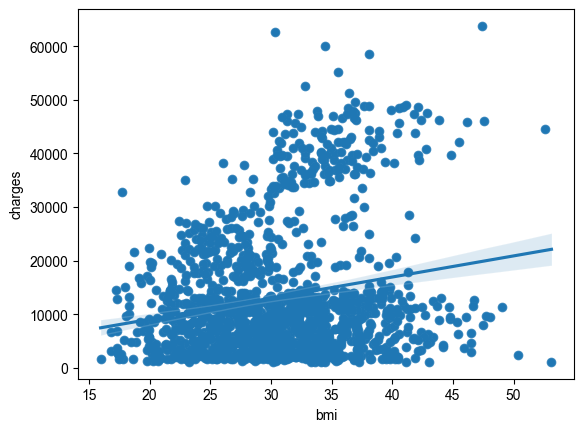

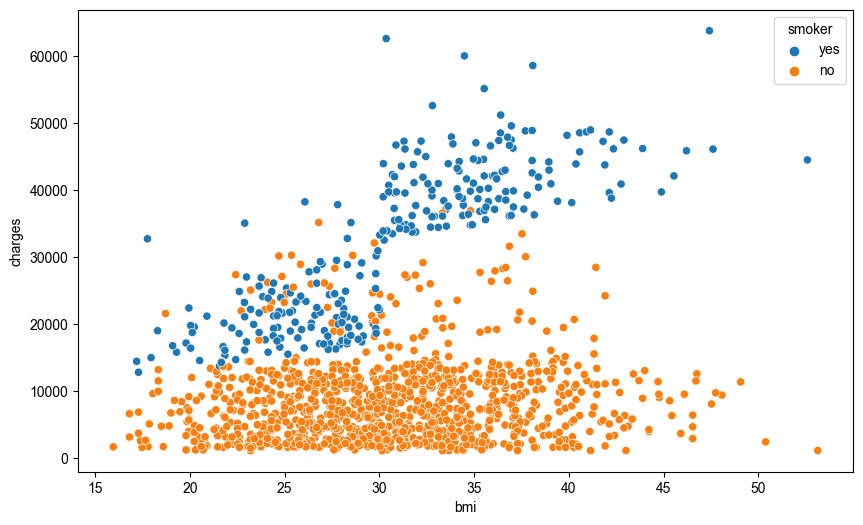

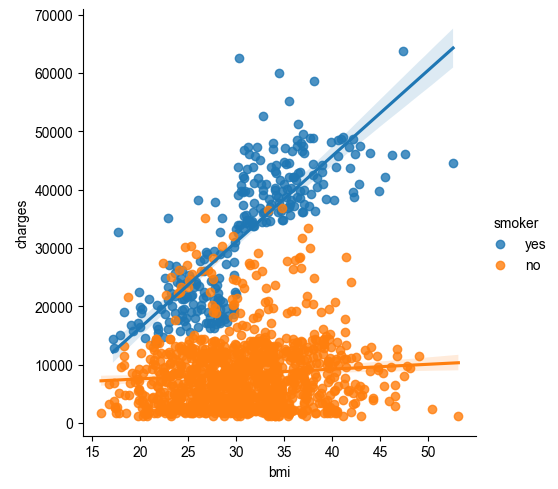

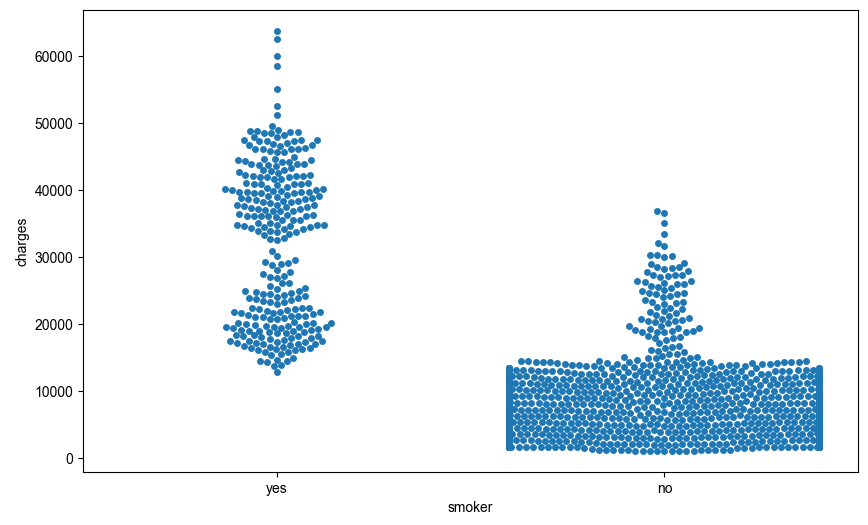

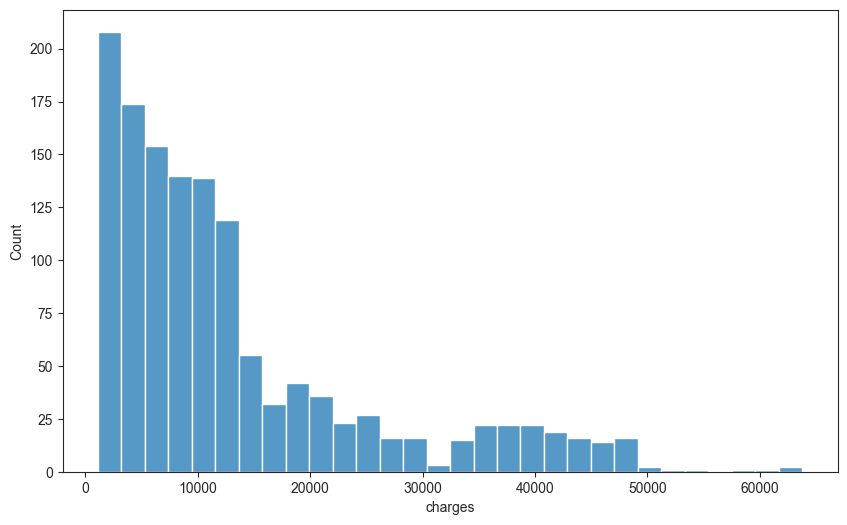

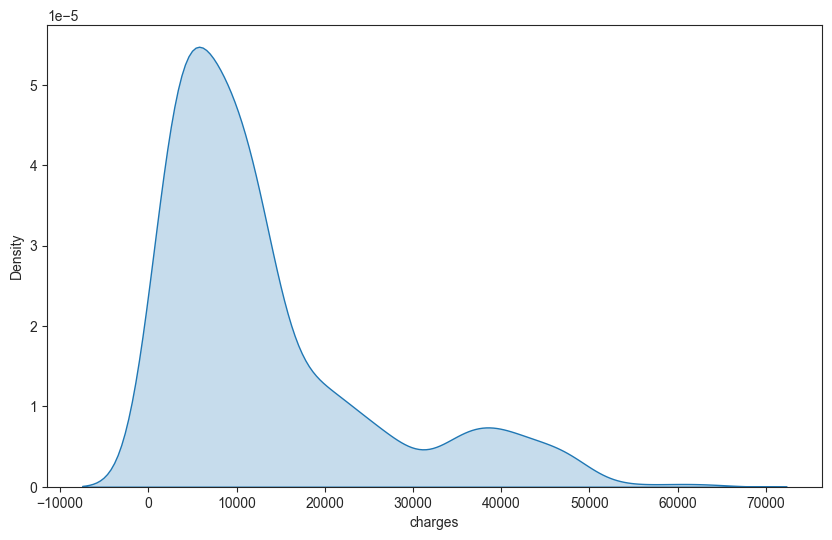

<Figure size 1000x600 with 0 Axes>

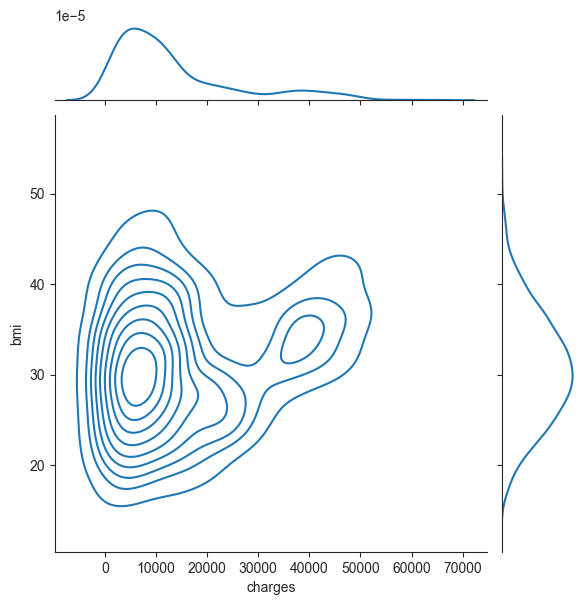

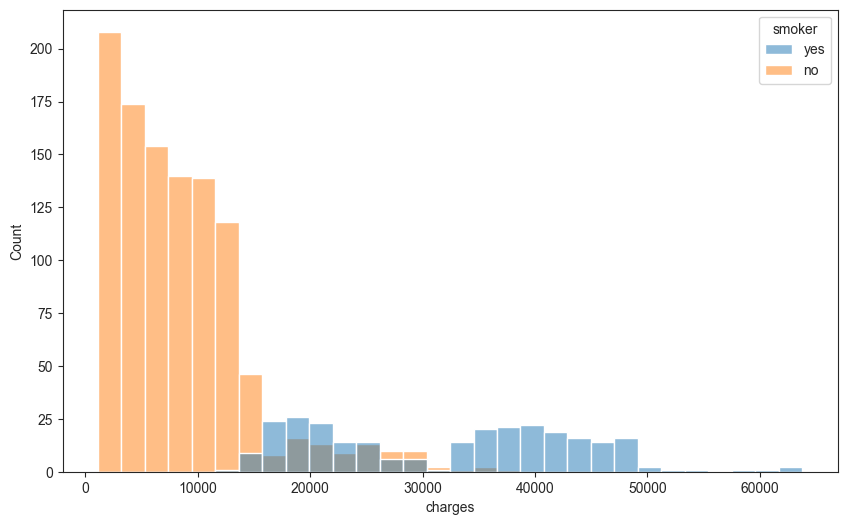

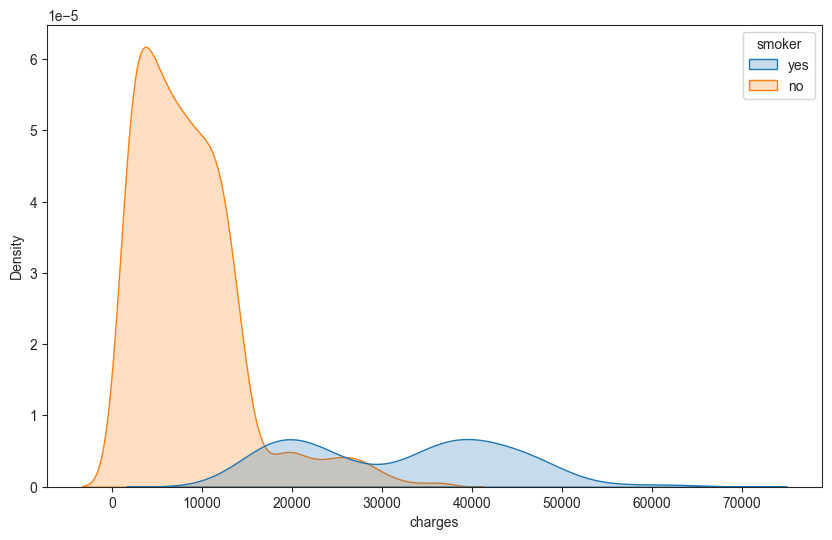

In [94]:
data = pd.read_csv('data/insurance.csv')
sns.scatterplot(x=data['bmi'], y=data['charges'])
sns.regplot(x=data['bmi'], y=data['charges'])           # regression line fitting (x,y), order=2 specify order of regression
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['bmi'], y=data['charges'], hue=data['smoker'])     # seperate (x,y) by category smoker
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data)     # regression lines fitting (x,y) for each category
plt.figure(figsize=(10,6))
sns.swarmplot(x=data['smoker'],y=data['charges'])                        # categorical scatter plot

sns.set_style("ticks")                          # change plot theme, "darkgrid", "whitegrid", "dark", "white"(default), "ticks"
# plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data.charges)                        # Histogram 
plt.figure(figsize=(10,6))
sns.kdeplot(data=data.charges, shade=True)    # kernel density estimate (KDE) plot. think of it as a smoothed histogram.
plt.figure(figsize=(10,6))
sns.jointplot(x=data.charges, y=data.bmi, kind="kde")    # 2D KDE plot
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='charges', hue='smoker')                # Histograms for each species
plt.figure(figsize=(10,6))
sns.kdeplot(data=data, x='charges', hue='smoker', shade=True)     # KDE plots for each species
# plt.savefig('test.jpg')

## Actionable insight

In [95]:
# Permutation Importance (one way to measure feature importance)
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(cl2, random_state=1).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # top higher score feature more important

Weight,Feature
0.1955 ± 0.0605,Sex
0.0820 ± 0.0152,Pclass
0.0652 ± 0.0367,Fare
0.0292 ± 0.0260,Cabin_missing
0.0213 ± 0.0250,Family_size
0.0180 ± 0.0329,Age


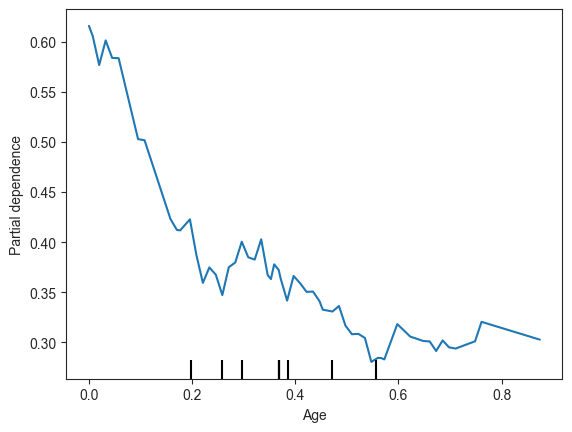

<Figure size 1200x600 with 0 Axes>

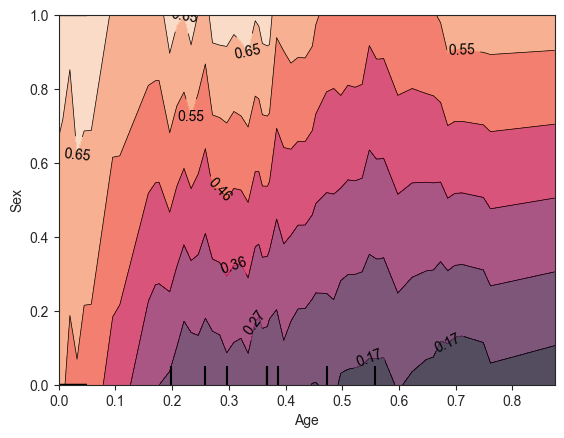

In [96]:
# Partial Dependence Plots (how a feature affects predictions)
from sklearn.inspection import PartialDependenceDisplay
disp1 = PartialDependenceDisplay.from_estimator(cl3, X_val, ['Age'])     # how age affect prediction
plt.show()
plt.figure(figsize=(12,6))
disp2 = PartialDependenceDisplay.from_estimator(cl3, X_val, [('Age','Sex')])   # 2D Partial Dependence Plots, how age and sex affect prediction
plt.show()

In [116]:
# SHAP     break down an individual prediction to show the impact of each feature
import shap
row_to_show = 88    # only consider one predicton
data_for_prediction =X_val.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
print(cl2.predict_proba(data_for_prediction_array))  # This person is 86.76% likely to survive.
explainer = shap.TreeExplainer(cl2) # Create object that can calculate shap values
    # shap.DeepExplainer works with Deep Learning models. LinearExplainer, GradiantExplainer
    # shap.KernelExplainer works with all models, slower and offers an approximation rather than exact Shap values.
shap_values = explainer.shap_values(data_for_prediction) #  shap_values object is a list with two arrays. 
    # first/second array is the SHAP values for a negative/positive outcome 
shap_v=pd.DataFrame(shap_values,columns=X_val.columns, index=['negative outcome', 'positive outcome'])
print(shap_v)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)
    # In the plot, feature values increase/decrease the prediction are in pink/blue, visual size shows the magnitude 
    # of the feature's effect. Subtract the blue bars from the length of the pink bars equals the distance from the 
    # base value to the output.


[[0. 1.]]
                    Pclass       Sex       Age      Fare  Cabin_missing  \
negative outcome -0.146912 -0.418283 -0.049714 -0.020966       0.033106   
positive outcome  0.146912  0.418283  0.049714  0.020966      -0.033106   

                  Family_size  
negative outcome    -0.030565  
positive outcome     0.030565  


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


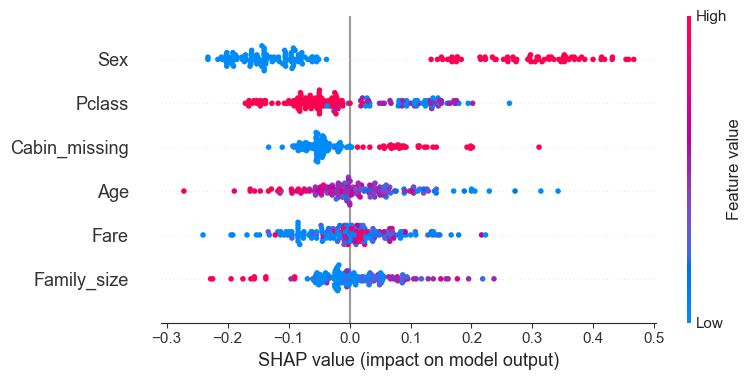

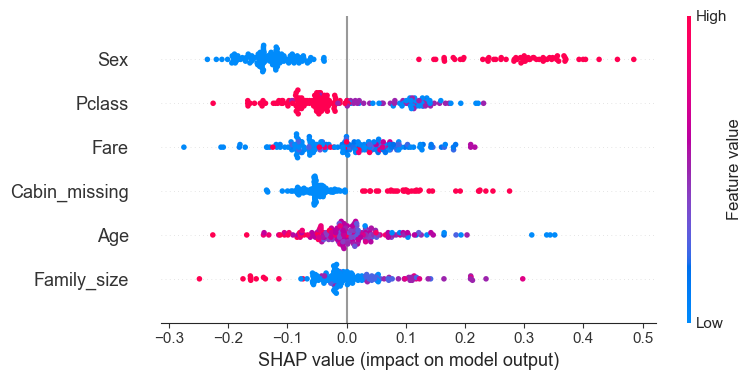

In [126]:
# SHAP Summary Plots
shap_values_val, shap_values_test = explainer.shap_values(X_val), explainer.shap_values(X_test)
shap.summary_plot(shap_values_val[1], X_val)   # a great compliment plot for feature importance, 
    # featres at top and with more separeated data points are more important
shap.summary_plot(shap_values_test[1], X_test) 

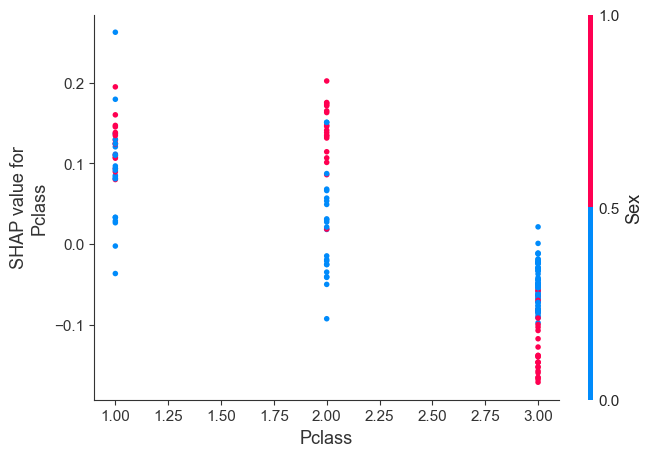

In [142]:
# SHAP Dependence Contribution Plots
shap_values = explainer.shap_values(X_val)
shap.dependence_plot('Pclass', shap_values[1], X_val, interaction_index="Fare") 
    # show pclass=1 has higher chance to surive(higher SHAP[1] value), follow by pclass=2, then pclass=3
    # pclass=1 fare cost is higher than class 2 and 3
